# Python library importing

In [339]:
import torch
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from keras.layers import Dense, Flatten, Dropout, BatchNormalization


import sklearn
import pandas as pd
import seaborn
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNetCV, BayesianRidge
import sklearn
from sklearn import svm
import os
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import KFold
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier, VotingRegressor, GradientBoostingClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder, RobustScaler
import time
import xgboost as xgb


import seaborn as sns
import warnings
warnings.simplefilter("ignore")

### is torch and tensorflow available cuda

In [263]:
print(f'torch cuda availabling = {torch.cuda.is_available()}')
print(f'tensorflow cuda availabling = {tf.test.is_gpu_available()}');

torch cuda availabling = True
tensorflow cuda availabling = True


2023-05-26 03:32:34.918502: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-26 03:32:34.918711: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-26 03:32:34.918820: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-26 03:32:34.918972: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-26 03:32:34.919082: I tensorflow/compiler/xla/stream_executo

# Prepairing dataset

In [264]:
df = pd.read_csv("test_well.csv")
print(f"Размерность датасета = {df.shape}")

Размерность датасета = (20020, 19)


In [265]:
df.head()

,DT_HOUR,EXT_DATA,LIQ_RATE,OIL_RATE,WATER_CUT,PLIN,QGAS,FREQ_HZ,ACTIV_POWER,PED_T,PINP,I_B,I_A,I_C,U_AB,U_BC,U_CA,U_OTP,COS_PHI
0,2021-03-21 00:00:00,0,NaN,NaN,NaN,NaN,NaN,NaN,67.925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-03-21 00:19:23,0,NaN,NaN,NaN,16.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-03-21 00:19:26,0,NaN,NaN,NaN,NaN,NaN,40.0,NaN,0.0,37.17,29.5,29.4,29.6,396.0,399.0,399.0,NaN,71.0
3,2021-03-21 00:20:00,0,NaN,NaN,NaN,NaN,NaN,NaN,67.920,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-03-21 00:38:32,0,NaN,NaN,NaN,17.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


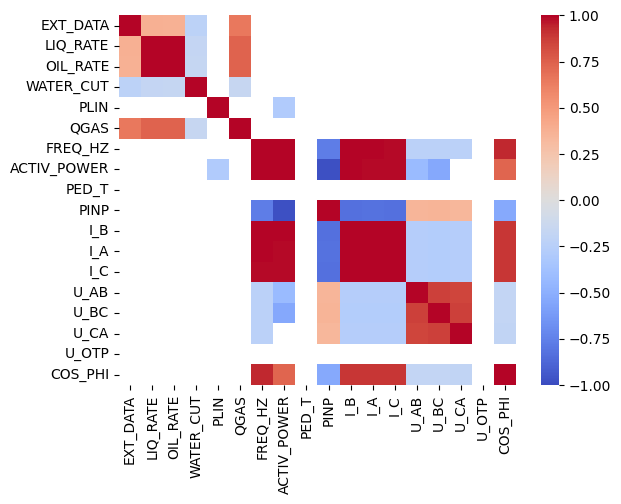

In [266]:

sns.heatmap(df.corr(),
            # дополнительно пропишем цветовую гамму
            cmap= 'coolwarm',
            # и зададим диапазон от -1 до 1
            vmin = -1, vmax = 1);

In [267]:
# Очистим датафрейм от неинформативных и пустых столбцов
df = df.drop(["EXT_DATA", "PED_T", "U_OTP", "PLIN", ], axis=1)
print(df.shape)

(20020, 15)


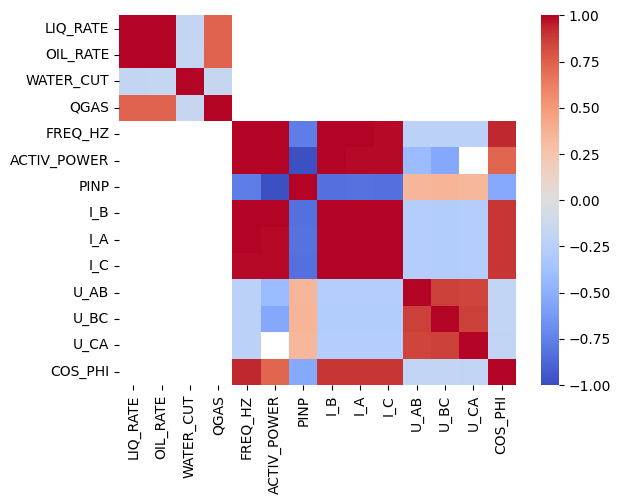

In [268]:
sns.heatmap(df.corr(),
            # дополнительно пропишем цветовую гамму
            cmap= 'coolwarm',
            # и зададим диапазон от -1 до 1
            vmin = -1, vmax = 1);

In [269]:
print("Проверка на отстутствующие данные")
df.isnull().sum()

Проверка на отстутствующие данные


DT_HOUR            0
LIQ_RATE       19874
OIL_RATE       19874
WATER_CUT      19874
QGAS           19874
FREQ_HZ        13425
ACTIV_POWER    13428
PINP           13425
I_B            13424
I_A            13424
I_C            13425
U_AB           13425
U_BC           13425
U_CA           13425
COS_PHI        13425
dtype: int64

In [270]:
df.describe(include='all')

,DT_HOUR,LIQ_RATE,OIL_RATE,WATER_CUT,QGAS,FREQ_HZ,ACTIV_POWER,PINP,I_B,I_A,I_C,U_AB,U_BC,U_CA,COS_PHI
count,20020,146.000000,146.000000,146.000000,146.000000,6595.000000,6592.000000,6595.000000,6596.000000,6596.000000,6595.000000,6595.000000,6595.000000,6595.000000,6595.000000
unique,20018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2021-06-18 08:59:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,415.724247,45.484384,88.097397,2165.620274,41.782948,77.426187,36.535782,31.122165,31.111098,31.244458,394.055345,398.266262,397.039121,72.361183
std,NaN,40.139969,4.454233,0.174743,296.131190,1.701624,5.949151,0.377892,1.419314,1.416309,1.439096,2.871972,2.894213,2.860467,2.449727
min,NaN,0.000000,0.000000,87.460000,0.000000,0.000000,56.005000,35.870000,0.000000,0.000000,0.000000,380.000000,385.000000,384.000000,0.000000
25%,NaN,403.240000,44.005000,87.980000,2060.252500,41.000000,72.955000,36.170000,30.300000,30.300000,30.400000,392.000000,397.000000,396.000000,71.000000
50%,NaN,413.825000,44.995000,88.100000,2211.950000,41.000000,73.748000,36.680000,30.600000,30.600000,30.700000,394.000000,399.000000,397.000000,72.000000
75%,NaN,436.287500,47.880000,88.220000,2285.165000,43.000000,83.550000,36.810000,32.200000,32.200000,32.400000,396.000000,401.000000,399.000000,73.000000


# Проверка правила

In [347]:
df.head()

,LIQ_RATE,OIL_RATE,WATER_CUT,QGAS,FREQ_HZ,ACTIV_POWER,PINP,I_B,I_A,I_C,U_AB,U_BC,U_CA,COS_PHI
date,,,,,,,,,,,,,,
2021-03-21,388.84,42.61,87.46,1853.77,40.0,68.041444,37.168472,29.459722,29.461111,29.552778,395.416667,398.861111,398.958333,71.0
2021-03-22,390.57,42.59,88.04,1809.27,40.0,68.106472,37.155556,29.462500,29.463889,29.563889,393.916667,399.166667,397.638889,71.0
2021-03-23,395.10,42.47,87.95,1822.53,40.0,68.024792,37.147778,29.445833,29.441667,29.537500,395.486111,400.666667,398.083333,71.0
2021-03-24,389.34,42.54,88.02,1855.33,40.0,68.118278,37.144306,29.451389,29.444444,29.534722,395.138889,400.083333,397.805556,71.0
2021-03-25,391.28,42.55,88.22,1827.74,40.0,68.120028,37.135000,29.454167,29.445833,29.550000,396.805556,399.916667,398.111111,71.0


## Правило не работает - объяснить при защите

In [271]:
print("\nПроверка на тип objects\n\n\n")
df.info();


Проверка на тип objects



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20020 entries, 0 to 20019
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DT_HOUR      20020 non-null  object 
 1   LIQ_RATE     146 non-null    float64
 2   OIL_RATE     146 non-null    float64
 3   WATER_CUT    146 non-null    float64
 4   QGAS         146 non-null    float64
 5   FREQ_HZ      6595 non-null   float64
 6   ACTIV_POWER  6592 non-null   float64
 7   PINP         6595 non-null   float64
 8   I_B          6596 non-null   float64
 9   I_A          6596 non-null   float64
 10  I_C          6595 non-null   float64
 11  U_AB         6595 non-null   float64
 12  U_BC         6595 non-null   float64
 13  U_CA         6595 non-null   float64
 14  COS_PHI      6595 non-null   float64
dtypes: float64(14), object(1)
memory usage: 2.3+ MB


In [272]:
# Преобразование столбца DT_HOUR к типу datetime
df["DT_HOUR"] = pd.to_datetime(df['DT_HOUR'], format='%Y-%m-%dT')
df

,DT_HOUR,LIQ_RATE,OIL_RATE,WATER_CUT,QGAS,FREQ_HZ,ACTIV_POWER,PINP,I_B,I_A,I_C,U_AB,U_BC,U_CA,COS_PHI
0,2021-03-21 00:00:00,NaN,NaN,NaN,NaN,NaN,67.925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-03-21 00:19:23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-03-21 00:19:26,NaN,NaN,NaN,NaN,40.0,NaN,37.17,29.5,29.4,29.6,396.0,399.0,399.0,71.0
3,2021-03-21 00:20:00,NaN,NaN,NaN,NaN,NaN,67.920,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-03-21 00:38:32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20015,2021-06-20 23:39:18,NaN,NaN,NaN,NaN,43.0,NaN,36.02,32.2,32.2,32.4,394.0,397.0,397.0,74.0
20016,2021-06-20 23:40:00,NaN,NaN,NaN,NaN,NaN,83.540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20017,2021-06-20 23:59:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20018,2021-06-20 23:59:49,NaN,NaN,NaN,NaN,43.0,NaN,36.03,32.2,32.3,32.3,394.0,399.0,397.0,74.0


In [273]:
print("\nПроверка, что теперь есть тип datetime objects\n\n")
df["DT_HOUR"].info()


Проверка, что теперь есть тип datetime objects


<class 'pandas.core.series.Series'>
RangeIndex: 20020 entries, 0 to 20019
Series name: DT_HOUR
Non-Null Count  Dtype         
--------------  -----         
20020 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 156.5 KB


In [274]:
# Отсавляем в каждом замере только дату
df["date"] = df['DT_HOUR'].apply(lambda x: x.strftime('%Y-%m-%d'))
df

,DT_HOUR,LIQ_RATE,OIL_RATE,WATER_CUT,QGAS,FREQ_HZ,ACTIV_POWER,PINP,I_B,I_A,I_C,U_AB,U_BC,U_CA,COS_PHI,date
0,2021-03-21 00:00:00,NaN,NaN,NaN,NaN,NaN,67.925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-03-21
1,2021-03-21 00:19:23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-03-21
2,2021-03-21 00:19:26,NaN,NaN,NaN,NaN,40.0,NaN,37.17,29.5,29.4,29.6,396.0,399.0,399.0,71.0,2021-03-21
3,2021-03-21 00:20:00,NaN,NaN,NaN,NaN,NaN,67.920,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-03-21
4,2021-03-21 00:38:32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-03-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20015,2021-06-20 23:39:18,NaN,NaN,NaN,NaN,43.0,NaN,36.02,32.2,32.2,32.4,394.0,397.0,397.0,74.0,2021-06-20
20016,2021-06-20 23:40:00,NaN,NaN,NaN,NaN,NaN,83.540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-20
20017,2021-06-20 23:59:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-20
20018,2021-06-20 23:59:49,NaN,NaN,NaN,NaN,43.0,NaN,36.03,32.2,32.3,32.3,394.0,399.0,397.0,74.0,2021-06-20


In [275]:
# Группируем по дням показатели замеров и находим среднее значение для каждого дня
df = df.groupby("date").agg("mean")
df

,LIQ_RATE,OIL_RATE,WATER_CUT,QGAS,FREQ_HZ,ACTIV_POWER,PINP,I_B,I_A,I_C,U_AB,U_BC,U_CA,COS_PHI
date,,,,,,,,,,,,,,
2021-03-21,388.84,42.61,87.46,1853.77,40.0,68.041444,37.168472,29.459722,29.461111,29.552778,395.416667,398.861111,398.958333,71.000000
2021-03-22,390.57,42.59,88.04,1809.27,40.0,68.106472,37.155556,29.462500,29.463889,29.563889,393.916667,399.166667,397.638889,71.000000
2021-03-23,395.10,42.47,87.95,1822.53,40.0,68.024792,37.147778,29.445833,29.441667,29.537500,395.486111,400.666667,398.083333,71.000000
2021-03-24,389.34,42.54,88.02,1855.33,40.0,68.118278,37.144306,29.451389,29.444444,29.534722,395.138889,400.083333,397.805556,71.000000
2021-03-25,391.28,42.55,88.22,1827.74,40.0,68.120028,37.135000,29.454167,29.445833,29.550000,396.805556,399.916667,398.111111,71.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-16,435.36,47.78,88.12,2247.43,43.0,83.571292,36.037500,32.233333,32.198611,32.381944,394.777778,398.430556,396.736111,73.000000
2021-06-17,455.25,49.96,88.43,1416.76,43.0,83.633875,36.036111,32.219444,32.194444,32.362500,392.361111,396.583333,395.194444,73.000000
2021-06-18,433.74,47.62,88.32,2166.77,43.0,83.449194,36.037361,32.212500,32.205556,32.355556,391.611111,396.388889,395.000000,73.000000


In [276]:
df.shape

(92, 14)

In [277]:
print("Проверка на отстутствующие данные")
df.isnull().sum()

Проверка на отстутствующие данные


LIQ_RATE       4
OIL_RATE       4
WATER_CUT      4
QGAS           4
FREQ_HZ        0
ACTIV_POWER    0
PINP           0
I_B            0
I_A            0
I_C            0
U_AB           0
U_BC           0
U_CA           0
COS_PHI        0
dtype: int64

In [278]:
print('данные с пропусками')
is_null = df.isnull()
row_with_null = is_null.any(axis=1)
rows_with_null = df[row_with_null]
rows_with_null

данные с пропусками


,LIQ_RATE,OIL_RATE,WATER_CUT,QGAS,FREQ_HZ,ACTIV_POWER,PINP,I_B,I_A,I_C,U_AB,U_BC,U_CA,COS_PHI
date,,,,,,,,,,,,,,
2021-03-27,NaN,NaN,NaN,NaN,40.0,68.195514,37.109296,29.463380,29.469014,29.559155,396.873239,400.718310,399.056338,71.0
2021-03-29,NaN,NaN,NaN,NaN,40.0,68.019847,37.103333,29.451389,29.456944,29.537500,396.402778,400.305556,400.222222,71.0
2021-05-26,NaN,NaN,NaN,NaN,43.0,83.525958,36.174521,32.227397,32.230137,32.382192,394.821918,398.397260,397.369863,73.0
2021-05-29,NaN,NaN,NaN,NaN,43.0,83.535667,36.164722,32.240278,32.231944,32.381944,391.611111,396.513889,395.166667,73.0


In [279]:
# Заменим их на среднее - это не страшно, потому что вскоре будем иметь с RobustScaler?который борется с "мусором"
df.fillna(df.mean(), inplace=True)

In [280]:
print("Проверка на отстутствующие данные")
df.isnull().sum()

Проверка на отстутствующие данные


LIQ_RATE       0
OIL_RATE       0
WATER_CUT      0
QGAS           0
FREQ_HZ        0
ACTIV_POWER    0
PINP           0
I_B            0
I_A            0
I_C            0
U_AB           0
U_BC           0
U_CA           0
COS_PHI        0
dtype: int64

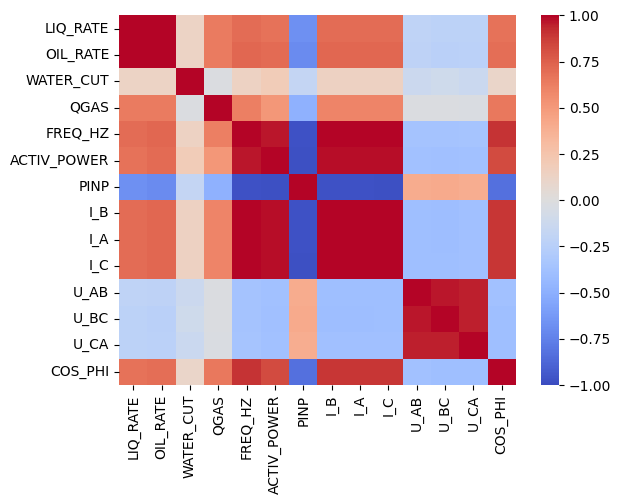

In [281]:
sns.heatmap(df.corr(),
            # дополнительно пропишем цветовую гамму
            cmap= 'coolwarm',
            # и зададим диапазон от -1 до 1
            vmin = -1, vmax = 1);

In [282]:
Y = df['LIQ_RATE']
Y.describe()

count     92.000000
mean     415.961667
std       22.559670
min      290.546667
25%      403.351250
50%      406.250000
75%      436.317917
max      455.250000
Name: LIQ_RATE, dtype: float64

In [283]:
df1 = df.drop(['LIQ_RATE'], axis=1)
df1

,OIL_RATE,WATER_CUT,QGAS,FREQ_HZ,ACTIV_POWER,PINP,I_B,I_A,I_C,U_AB,U_BC,U_CA,COS_PHI
date,,,,,,,,,,,,,
2021-03-21,42.61,87.46,1853.77,40.0,68.041444,37.168472,29.459722,29.461111,29.552778,395.416667,398.861111,398.958333,71.000000
2021-03-22,42.59,88.04,1809.27,40.0,68.106472,37.155556,29.462500,29.463889,29.563889,393.916667,399.166667,397.638889,71.000000
2021-03-23,42.47,87.95,1822.53,40.0,68.024792,37.147778,29.445833,29.441667,29.537500,395.486111,400.666667,398.083333,71.000000
2021-03-24,42.54,88.02,1855.33,40.0,68.118278,37.144306,29.451389,29.444444,29.534722,395.138889,400.083333,397.805556,71.000000
2021-03-25,42.55,88.22,1827.74,40.0,68.120028,37.135000,29.454167,29.445833,29.550000,396.805556,399.916667,398.111111,71.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-16,47.78,88.12,2247.43,43.0,83.571292,36.037500,32.233333,32.198611,32.381944,394.777778,398.430556,396.736111,73.000000
2021-06-17,49.96,88.43,1416.76,43.0,83.633875,36.036111,32.219444,32.194444,32.362500,392.361111,396.583333,395.194444,73.000000
2021-06-18,47.62,88.32,2166.77,43.0,83.449194,36.037361,32.212500,32.205556,32.355556,391.611111,396.388889,395.000000,73.000000


In [19]:
# Гистограмма и боксплот
#df["Total day minutes"].hist();
#sns.boxplot(df["Total day minutes"]);

In [61]:
# StandartScaler or RobustScaler(со вторым мы можем удалить выбросы и использовать StandartScaller)

In [286]:
scaler = RobustScaler()
robust_df = scaler.fit_transform(df1)
robust_df = pd.DataFrame(robust_df)

In [287]:
robust_df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,92.000000,92.000000,92.000000,92.000000,9.200000e+01,92.000000,9.200000e+01,92.000000,92.000000,92.000000,92.000000,9.200000e+01,92.000000
mean,0.335921,-0.030773,-0.139852,0.388942,3.459990e-01,-0.236213,2.998862e-01,0.302780,0.303444,-0.181429,-0.046462,-1.230365e-01,0.178136
std,0.664714,0.890384,1.061187,0.581694,5.627438e-01,0.583674,5.682302e-01,0.568162,0.565291,0.766705,0.821074,9.176061e-01,0.586317
min,-3.184347,-4.000235,-4.493212,-0.500000,-5.428547e-01,-1.026627,-5.856171e-01,-0.582080,-0.576806,-3.084746,-3.137157,-3.626912e+00,-1.569444
25%,-0.050129,-0.504111,-0.585580,0.000000,-7.355345e-02,-0.819841,-1.053890e-01,-0.102704,-0.103424,-0.588983,-0.432869,-5.281776e-01,-0.500000
50%,0.000000,0.000000,0.000000,0.000000,-6.704706e-16,0.000000,9.408706e-16,0.000000,0.000000,0.000000,0.000000,-1.036150e-14,0.000000
75%,0.949871,0.495889,0.414420,1.000000,9.264466e-01,0.180159,8.946110e-01,0.897296,0.896576,0.411017,0.567131,4.718224e-01,0.500000
max,1.490944,2.015269,1.797292,1.000000,9.445099e-01,0.758544,9.144749e-01,0.920181,0.913067,0.711864,1.266716,1.319924e+00,1.000000


In [288]:
X_train, X_test, y_train, y_test = train_test_split(robust_df, Y, test_size=0.2, random_state=1)

# Classic machine learning

In [216]:
?CatBoostRegressor

In [289]:
# GRID FOR RIDGE
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
param = {
    'alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100],
    'fit_intercept':[True, False],
}
model = Ridge()
search = GridSearchCV(model, param, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv)
# execute search
result = search.fit(X_train, y_train)
print(f'result for Ridge = {result.best_params_}')

# GRID FOR SVR
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svr = SVR()
result = GridSearchCV(svr, parameters)
result.fit(X_train, y_train)
print(f'result for SVR = {result.best_params_}')

# GRID FOR LAsso
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
param = {
    'alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100],
}
model = Lasso()
search = GridSearchCV(model, param, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv)
# execute search
result = search.fit(X_train, y_train)
print(f'result for Lasso = {result.best_params_}')


#CatBoostRegressor
model = CatBoostRegressor()
grid = {'l2_leaf_reg': [1, 3, 5, 7, 9]}
search = GridSearchCV(model, grid, n_jobs=-1)
result = search.fit(X_train, y_train)
print(f'result for Cat = {result.best_params_}')



result for Ridge = {'alpha': 0.01, 'fit_intercept': True}
result for SVR = {'C': 10, 'kernel': 'linear'}


/home/fatik/anaconda3/envs/env_python3.9.2/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.423e+01, tolerance: 2.167e+00
  model = cd_fast.enet_coordinate_descent(
/home/fatik/anaconda3/envs/env_python3.9.2/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.323e+01, tolerance: 2.180e+00
  model = cd_fast.enet_coordinate_descent(
/home/fatik/anaconda3/envs/env_python3.9.2/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of 

result for Lasso = {'alpha': 0.1}
0:	learn: 17.1144493	total: 46.6ms	remaining: 46.5s
1:	learn: 16.7042477	total: 47.3ms	remaining: 23.6s
2:	learn: 16.3251327	total: 48ms	remaining: 16s
3:	learn: 15.9198876	total: 48.7ms	remaining: 12.1s
4:	learn: 15.5511155	total: 49.4ms	remaining: 9.83s
5:	learn: 15.2162651	total: 50.1ms	remaining: 8.3s
6:	learn: 14.8876590	total: 50.8ms	remaining: 7.2s
7:	learn: 14.5304186	total: 51.5ms	remaining: 6.38s
8:	learn: 14.1883479	total: 52.1ms	remaining: 5.74s
9:	learn: 13.8558001	total: 60.5ms	remaining: 5.99s
10:	learn: 13.5290758	total: 60.7ms	remaining: 5.46s
11:	learn: 13.2055235	total: 61.2ms	remaining: 5.04s
12:	learn: 12.9035159	total: 61.6ms	remaining: 4.68s
13:	learn: 12.6498990	total: 62ms	remaining: 4.37s
14:	learn: 12.3887530	total: 62.4ms	remaining: 4.1s
15:	learn: 12.1142131	total: 62.8ms	remaining: 3.86s
16:	learn: 11.8485075	total: 63ms	remaining: 3.65s
17:	learn: 11.5917409	total: 63.5ms	remaining: 3.46s
18:	learn: 11.3367815	total: 63.9

0:	learn: 17.9473852	total: 46.8ms	remaining: 46.7s
1:	learn: 17.6230534	total: 47.2ms	remaining: 23.6s
2:	learn: 17.3260928	total: 47.8ms	remaining: 15.9s
3:	learn: 17.0107015	total: 48.3ms	remaining: 12s
4:	learn: 16.6877552	total: 48.8ms	remaining: 9.71s
5:	learn: 16.4365554	total: 49.2ms	remaining: 8.15s
6:	learn: 16.1718131	total: 50.2ms	remaining: 7.13s
7:	learn: 15.8685621	total: 50.6ms	remaining: 6.28s
8:	learn: 15.5954054	total: 51ms	remaining: 5.62s
9:	learn: 15.2964529	total: 51.4ms	remaining: 5.09s
10:	learn: 15.0148565	total: 51.8ms	remaining: 4.66s
11:	learn: 14.7416226	total: 52.2ms	remaining: 4.3s
12:	learn: 14.4950574	total: 52.6ms	remaining: 3.99s
13:	learn: 14.2052066	total: 52.7ms	remaining: 3.71s
14:	learn: 13.9849001	total: 53.1ms	remaining: 3.48s
15:	learn: 13.7279480	total: 53.2ms	remaining: 3.27s
16:	learn: 13.4977934	total: 84.1ms	remaining: 4.86s
17:	learn: 13.2630024	total: 84.4ms	remaining: 4.61s
18:	learn: 13.0398533	total: 85ms	remaining: 4.39s
19:	learn:

0:	learn: 17.3285324	total: 47ms	remaining: 47s
1:	learn: 16.9228150	total: 47.4ms	remaining: 23.7s
2:	learn: 16.6105090	total: 49ms	remaining: 16.3s
3:	learn: 16.2239300	total: 50.3ms	remaining: 12.5s
4:	learn: 15.8435119	total: 50.6ms	remaining: 10.1s
5:	learn: 15.5058250	total: 50.9ms	remaining: 8.43s
6:	learn: 15.1791552	total: 51.2ms	remaining: 7.26s
7:	learn: 14.8380655	total: 52.8ms	remaining: 6.55s
8:	learn: 14.4986977	total: 53.1ms	remaining: 5.85s
9:	learn: 14.1694519	total: 53.4ms	remaining: 5.29s
10:	learn: 13.8503023	total: 53.7ms	remaining: 4.83s
11:	learn: 13.5289659	total: 54ms	remaining: 4.45s
12:	learn: 13.2375825	total: 54.4ms	remaining: 4.13s
13:	learn: 12.9312651	total: 55.5ms	remaining: 3.91s
14:	learn: 12.6413154	total: 56ms	remaining: 3.68s
15:	learn: 12.3687667	total: 56.4ms	remaining: 3.47s
16:	learn: 12.1157576	total: 57ms	remaining: 3.3s
17:	learn: 11.8786257	total: 57.4ms	remaining: 3.13s
18:	learn: 11.6112200	total: 57.9ms	remaining: 2.99s
19:	learn: 11.34

160:	learn: 1.2232250	total: 756ms	remaining: 3.94s
161:	learn: 1.2110284	total: 757ms	remaining: 3.92s
162:	learn: 1.1960912	total: 758ms	remaining: 3.89s
163:	learn: 1.1853298	total: 758ms	remaining: 3.86s
164:	learn: 1.1709318	total: 759ms	remaining: 3.84s
165:	learn: 1.1555454	total: 760ms	remaining: 3.81s
166:	learn: 1.1415702	total: 796ms	remaining: 3.97s
167:	learn: 1.1317910	total: 797ms	remaining: 3.95s
168:	learn: 1.1193784	total: 798ms	remaining: 3.92s
169:	learn: 1.1082904	total: 798ms	remaining: 3.9s
170:	learn: 1.0944139	total: 798ms	remaining: 3.87s
171:	learn: 1.0874829	total: 799ms	remaining: 3.85s
172:	learn: 1.0782035	total: 799ms	remaining: 3.82s
173:	learn: 1.0660978	total: 800ms	remaining: 3.8s
174:	learn: 1.0570820	total: 804ms	remaining: 3.79s
175:	learn: 1.0446912	total: 805ms	remaining: 3.77s
176:	learn: 1.0330233	total: 805ms	remaining: 3.74s
177:	learn: 1.0238414	total: 806ms	remaining: 3.72s
178:	learn: 1.0132827	total: 806ms	remaining: 3.7s
179:	learn: 1.0

159:	learn: 1.3123660	total: 384ms	remaining: 2.02s
160:	learn: 1.3003177	total: 385ms	remaining: 2s
161:	learn: 1.2878535	total: 385ms	remaining: 1.99s
162:	learn: 1.2717212	total: 386ms	remaining: 1.98s
163:	learn: 1.2604690	total: 386ms	remaining: 1.97s
164:	learn: 1.2540812	total: 386ms	remaining: 1.96s
165:	learn: 1.2386488	total: 387ms	remaining: 1.94s
166:	learn: 1.2243627	total: 387ms	remaining: 1.93s
167:	learn: 1.2107591	total: 388ms	remaining: 1.92s
168:	learn: 1.1970362	total: 388ms	remaining: 1.91s
169:	learn: 1.1811921	total: 390ms	remaining: 1.9s
170:	learn: 1.1665848	total: 390ms	remaining: 1.89s
171:	learn: 1.1533725	total: 392ms	remaining: 1.89s
172:	learn: 1.1415039	total: 393ms	remaining: 1.88s
173:	learn: 1.1293294	total: 393ms	remaining: 1.87s
174:	learn: 1.1165742	total: 397ms	remaining: 1.87s
175:	learn: 1.1071354	total: 398ms	remaining: 1.86s
176:	learn: 1.0949706	total: 399ms	remaining: 1.86s
177:	learn: 1.0815110	total: 400ms	remaining: 1.84s
178:	learn: 1.07

159:	learn: 2.5111368	total: 698ms	remaining: 3.67s
160:	learn: 2.4866067	total: 699ms	remaining: 3.64s
161:	learn: 2.4620992	total: 699ms	remaining: 3.62s
162:	learn: 2.4540298	total: 699ms	remaining: 3.59s
163:	learn: 2.4446977	total: 700ms	remaining: 3.56s
164:	learn: 2.4197751	total: 703ms	remaining: 3.56s
165:	learn: 2.4113014	total: 704ms	remaining: 3.54s
166:	learn: 2.3932269	total: 705ms	remaining: 3.51s
167:	learn: 2.3764490	total: 705ms	remaining: 3.49s
168:	learn: 2.3683125	total: 708ms	remaining: 3.48s
169:	learn: 2.3480849	total: 718ms	remaining: 3.51s
170:	learn: 2.3365600	total: 719ms	remaining: 3.49s
171:	learn: 2.3277387	total: 720ms	remaining: 3.47s
172:	learn: 2.3200380	total: 721ms	remaining: 3.45s
173:	learn: 2.3093114	total: 722ms	remaining: 3.43s
174:	learn: 2.2884295	total: 723ms	remaining: 3.41s
175:	learn: 2.2785649	total: 740ms	remaining: 3.46s
176:	learn: 2.2698013	total: 741ms	remaining: 3.44s
177:	learn: 2.2582746	total: 742ms	remaining: 3.43s
178:	learn: 

319:	learn: 0.2728135	total: 1.15s	remaining: 2.45s
320:	learn: 0.2714946	total: 1.15s	remaining: 2.44s
321:	learn: 0.2689010	total: 1.15s	remaining: 2.43s
322:	learn: 0.2663851	total: 1.15s	remaining: 2.42s
323:	learn: 0.2651207	total: 1.16s	remaining: 2.41s
324:	learn: 0.2633734	total: 1.16s	remaining: 2.4s
325:	learn: 0.2612866	total: 1.16s	remaining: 2.39s
326:	learn: 0.2594758	total: 1.19s	remaining: 2.44s
327:	learn: 0.2582543	total: 1.19s	remaining: 2.43s
328:	learn: 0.2558895	total: 1.19s	remaining: 2.43s
329:	learn: 0.2541401	total: 1.19s	remaining: 2.42s
330:	learn: 0.2525370	total: 1.19s	remaining: 2.41s
331:	learn: 0.2498887	total: 1.2s	remaining: 2.4s
332:	learn: 0.2471262	total: 1.2s	remaining: 2.4s
333:	learn: 0.2449123	total: 1.2s	remaining: 2.39s
334:	learn: 0.2428164	total: 1.2s	remaining: 2.38s
335:	learn: 0.2409254	total: 1.22s	remaining: 2.42s
336:	learn: 0.2387988	total: 1.23s	remaining: 2.41s
337:	learn: 0.2375553	total: 1.23s	remaining: 2.4s
338:	learn: 0.235470

319:	learn: 0.2775413	total: 1.51s	remaining: 3.21s
320:	learn: 0.2747928	total: 1.51s	remaining: 3.2s
321:	learn: 0.2731124	total: 1.52s	remaining: 3.19s
322:	learn: 0.2712053	total: 1.52s	remaining: 3.18s
323:	learn: 0.2697048	total: 1.52s	remaining: 3.17s
324:	learn: 0.2676920	total: 1.52s	remaining: 3.16s
325:	learn: 0.2650736	total: 1.52s	remaining: 3.14s
326:	learn: 0.2634873	total: 1.56s	remaining: 3.21s
327:	learn: 0.2616787	total: 1.56s	remaining: 3.19s
328:	learn: 0.2599451	total: 1.56s	remaining: 3.18s
329:	learn: 0.2583969	total: 1.56s	remaining: 3.17s
330:	learn: 0.2566663	total: 1.56s	remaining: 3.16s
331:	learn: 0.2542245	total: 1.56s	remaining: 3.14s
332:	learn: 0.2525375	total: 1.56s	remaining: 3.13s
333:	learn: 0.2512022	total: 1.56s	remaining: 3.12s
334:	learn: 0.2485942	total: 1.56s	remaining: 3.11s
335:	learn: 0.2472599	total: 1.56s	remaining: 3.09s
336:	learn: 0.2456612	total: 1.62s	remaining: 3.18s
337:	learn: 0.2437969	total: 1.62s	remaining: 3.17s
338:	learn: 0

476:	learn: 0.4440905	total: 1.88s	remaining: 2.06s
477:	learn: 0.4416329	total: 1.88s	remaining: 2.06s
478:	learn: 0.4407716	total: 1.89s	remaining: 2.05s
479:	learn: 0.4383567	total: 1.89s	remaining: 2.04s
480:	learn: 0.4362407	total: 1.89s	remaining: 2.04s
481:	learn: 0.4354003	total: 1.89s	remaining: 2.03s
482:	learn: 0.4330353	total: 1.89s	remaining: 2.02s
483:	learn: 0.4309877	total: 1.89s	remaining: 2.01s
484:	learn: 0.4291558	total: 1.89s	remaining: 2s
485:	learn: 0.4283428	total: 1.89s	remaining: 2s
486:	learn: 0.4260379	total: 1.89s	remaining: 1.99s
487:	learn: 0.4237732	total: 1.89s	remaining: 1.98s
488:	learn: 0.4220225	total: 1.89s	remaining: 1.98s
489:	learn: 0.4212274	total: 1.89s	remaining: 1.97s
490:	learn: 0.4186749	total: 1.89s	remaining: 1.96s
491:	learn: 0.4170480	total: 1.89s	remaining: 1.95s
492:	learn: 0.4147142	total: 1.89s	remaining: 1.95s
493:	learn: 0.4124186	total: 1.89s	remaining: 1.94s
494:	learn: 0.4116382	total: 1.89s	remaining: 1.93s
495:	learn: 0.4102

636:	learn: 0.0201852	total: 2.02s	remaining: 1.15s
637:	learn: 0.0200443	total: 2.02s	remaining: 1.15s
638:	learn: 0.0198690	total: 2.02s	remaining: 1.14s
639:	learn: 0.0197670	total: 2.02s	remaining: 1.14s
640:	learn: 0.0195554	total: 2.02s	remaining: 1.13s
641:	learn: 0.0193688	total: 2.02s	remaining: 1.13s
642:	learn: 0.0191651	total: 2.02s	remaining: 1.12s
643:	learn: 0.0189671	total: 2.02s	remaining: 1.12s
644:	learn: 0.0188108	total: 2.02s	remaining: 1.11s
645:	learn: 0.0186600	total: 2.02s	remaining: 1.11s
646:	learn: 0.0184408	total: 2.02s	remaining: 1.1s
647:	learn: 0.0182286	total: 2.02s	remaining: 1.1s
648:	learn: 0.0180561	total: 2.02s	remaining: 1.09s
649:	learn: 0.0179149	total: 2.02s	remaining: 1.09s
650:	learn: 0.0177139	total: 2.02s	remaining: 1.08s
651:	learn: 0.0175904	total: 2.02s	remaining: 1.08s
652:	learn: 0.0174897	total: 2.03s	remaining: 1.08s
653:	learn: 0.0172968	total: 2.03s	remaining: 1.07s
654:	learn: 0.0171700	total: 2.03s	remaining: 1.07s
655:	learn: 0.

796:	learn: 0.0090470	total: 2.67s	remaining: 679ms
797:	learn: 0.0089871	total: 2.67s	remaining: 675ms
798:	learn: 0.0088920	total: 2.67s	remaining: 671ms
799:	learn: 0.0088473	total: 2.67s	remaining: 667ms
800:	learn: 0.0087984	total: 2.67s	remaining: 663ms
801:	learn: 0.0086874	total: 2.67s	remaining: 659ms
802:	learn: 0.0086397	total: 2.67s	remaining: 655ms
803:	learn: 0.0085824	total: 2.67s	remaining: 651ms
804:	learn: 0.0085274	total: 2.67s	remaining: 647ms
805:	learn: 0.0084778	total: 2.67s	remaining: 643ms
806:	learn: 0.0084365	total: 2.67s	remaining: 639ms
807:	learn: 0.0083308	total: 2.67s	remaining: 635ms
808:	learn: 0.0082852	total: 2.67s	remaining: 631ms
809:	learn: 0.0082375	total: 2.67s	remaining: 627ms
810:	learn: 0.0081875	total: 2.67s	remaining: 623ms
811:	learn: 0.0080856	total: 2.67s	remaining: 619ms
812:	learn: 0.0080503	total: 2.67s	remaining: 615ms
813:	learn: 0.0080089	total: 2.68s	remaining: 612ms
814:	learn: 0.0079632	total: 2.68s	remaining: 608ms
815:	learn: 

476:	learn: 0.4955634	total: 2.09s	remaining: 2.29s
477:	learn: 0.4933585	total: 2.09s	remaining: 2.28s
478:	learn: 0.4902684	total: 2.09s	remaining: 2.27s
479:	learn: 0.4880380	total: 2.09s	remaining: 2.26s
480:	learn: 0.4853384	total: 2.09s	remaining: 2.25s
481:	learn: 0.4823420	total: 2.09s	remaining: 2.25s
482:	learn: 0.4802888	total: 2.09s	remaining: 2.24s
483:	learn: 0.4781307	total: 2.09s	remaining: 2.23s
484:	learn: 0.4766599	total: 2.09s	remaining: 2.22s
485:	learn: 0.4747513	total: 2.09s	remaining: 2.21s
486:	learn: 0.4719120	total: 2.09s	remaining: 2.2s
487:	learn: 0.4690729	total: 2.09s	remaining: 2.2s
488:	learn: 0.4653498	total: 2.09s	remaining: 2.19s
489:	learn: 0.4632437	total: 2.09s	remaining: 2.18s
490:	learn: 0.4609397	total: 2.1s	remaining: 2.17s
491:	learn: 0.4573246	total: 2.1s	remaining: 2.16s
492:	learn: 0.4546161	total: 2.1s	remaining: 2.16s
493:	learn: 0.4526862	total: 2.1s	remaining: 2.15s
494:	learn: 0.4500576	total: 2.1s	remaining: 2.14s
495:	learn: 0.44712

890:	learn: 0.0027334	total: 2.94s	remaining: 359ms
891:	learn: 0.0027058	total: 2.94s	remaining: 356ms
892:	learn: 0.0026828	total: 2.94s	remaining: 352ms
893:	learn: 0.0026684	total: 2.94s	remaining: 348ms
894:	learn: 0.0026602	total: 2.94s	remaining: 345ms
895:	learn: 0.0026424	total: 2.94s	remaining: 341ms
896:	learn: 0.0026164	total: 2.94s	remaining: 338ms
897:	learn: 0.0026025	total: 2.94s	remaining: 334ms
898:	learn: 0.0025767	total: 2.94s	remaining: 330ms
899:	learn: 0.0025529	total: 2.94s	remaining: 327ms
900:	learn: 0.0025453	total: 2.94s	remaining: 323ms
901:	learn: 0.0025310	total: 2.94s	remaining: 320ms
902:	learn: 0.0025055	total: 2.94s	remaining: 316ms
903:	learn: 0.0024813	total: 2.94s	remaining: 313ms
904:	learn: 0.0024612	total: 2.95s	remaining: 309ms
905:	learn: 0.0024405	total: 2.95s	remaining: 306ms
906:	learn: 0.0024232	total: 2.95s	remaining: 303ms
907:	learn: 0.0024050	total: 2.95s	remaining: 299ms
908:	learn: 0.0023835	total: 2.95s	remaining: 296ms
909:	learn: 

952:	learn: 0.0021702	total: 2.45s	remaining: 121ms
953:	learn: 0.0021522	total: 2.45s	remaining: 118ms
954:	learn: 0.0021444	total: 2.46s	remaining: 116ms
955:	learn: 0.0021270	total: 2.46s	remaining: 113ms
956:	learn: 0.0021116	total: 2.46s	remaining: 110ms
957:	learn: 0.0020902	total: 2.46s	remaining: 108ms
958:	learn: 0.0020830	total: 2.46s	remaining: 105ms
959:	learn: 0.0020722	total: 2.46s	remaining: 102ms
960:	learn: 0.0020652	total: 2.46s	remaining: 99.7ms
961:	learn: 0.0020548	total: 2.46s	remaining: 97.1ms
962:	learn: 0.0020437	total: 2.46s	remaining: 94.5ms
963:	learn: 0.0020383	total: 2.46s	remaining: 91.8ms
964:	learn: 0.0020220	total: 2.46s	remaining: 89.2ms
965:	learn: 0.0020183	total: 2.46s	remaining: 86.6ms
966:	learn: 0.0020021	total: 2.46s	remaining: 83.9ms
967:	learn: 0.0019954	total: 2.46s	remaining: 81.3ms
968:	learn: 0.0019795	total: 2.46s	remaining: 78.7ms
969:	learn: 0.0019627	total: 2.46s	remaining: 76.1ms
970:	learn: 0.0019592	total: 2.46s	remaining: 73.5ms
9

953:	learn: 0.0029600	total: 3.34s	remaining: 161ms
954:	learn: 0.0029317	total: 3.35s	remaining: 158ms
955:	learn: 0.0029162	total: 3.35s	remaining: 154ms
956:	learn: 0.0028917	total: 3.35s	remaining: 151ms
957:	learn: 0.0028607	total: 3.35s	remaining: 147ms
958:	learn: 0.0028429	total: 3.35s	remaining: 143ms
959:	learn: 0.0028298	total: 3.35s	remaining: 140ms
960:	learn: 0.0028091	total: 3.36s	remaining: 136ms
961:	learn: 0.0027941	total: 3.36s	remaining: 133ms
962:	learn: 0.0027721	total: 3.36s	remaining: 129ms
963:	learn: 0.0027553	total: 3.36s	remaining: 125ms
964:	learn: 0.0027284	total: 3.36s	remaining: 122ms
965:	learn: 0.0027120	total: 3.36s	remaining: 118ms
966:	learn: 0.0026960	total: 3.36s	remaining: 115ms
967:	learn: 0.0026734	total: 3.36s	remaining: 111ms
968:	learn: 0.0026515	total: 3.36s	remaining: 108ms
969:	learn: 0.0026389	total: 3.36s	remaining: 104ms
970:	learn: 0.0026209	total: 3.36s	remaining: 100ms
971:	learn: 0.0026104	total: 3.36s	remaining: 96.9ms
972:	learn:

269:	learn: 2.1768585	total: 340ms	remaining: 920ms
270:	learn: 2.1723605	total: 341ms	remaining: 917ms
271:	learn: 2.1569043	total: 341ms	remaining: 913ms
272:	learn: 2.1430502	total: 342ms	remaining: 910ms
273:	learn: 2.1273536	total: 342ms	remaining: 906ms
274:	learn: 2.1229791	total: 342ms	remaining: 903ms
275:	learn: 2.1177847	total: 343ms	remaining: 899ms
276:	learn: 2.1103323	total: 343ms	remaining: 896ms
277:	learn: 2.1060598	total: 344ms	remaining: 893ms
278:	learn: 2.0935169	total: 344ms	remaining: 889ms
279:	learn: 2.0893042	total: 345ms	remaining: 886ms
280:	learn: 2.0852404	total: 345ms	remaining: 883ms
281:	learn: 2.0706662	total: 345ms	remaining: 879ms
282:	learn: 2.0668205	total: 346ms	remaining: 876ms
283:	learn: 2.0539179	total: 346ms	remaining: 873ms
284:	learn: 2.0499585	total: 347ms	remaining: 869ms
285:	learn: 2.0362054	total: 347ms	remaining: 866ms
286:	learn: 2.0321810	total: 347ms	remaining: 863ms
287:	learn: 2.0281890	total: 348ms	remaining: 860ms
288:	learn: 

929:	learn: 0.0531145	total: 4.06s	remaining: 305ms
930:	learn: 0.0528760	total: 4.06s	remaining: 301ms
931:	learn: 0.0527447	total: 4.08s	remaining: 298ms
932:	learn: 0.0526162	total: 4.08s	remaining: 293ms
933:	learn: 0.0523852	total: 4.09s	remaining: 289ms
934:	learn: 0.0521763	total: 4.09s	remaining: 284ms
935:	learn: 0.0518380	total: 4.09s	remaining: 280ms
936:	learn: 0.0517126	total: 4.09s	remaining: 275ms
937:	learn: 0.0514752	total: 4.09s	remaining: 270ms
938:	learn: 0.0511484	total: 4.14s	remaining: 269ms
939:	learn: 0.0510627	total: 4.15s	remaining: 265ms
940:	learn: 0.0509407	total: 4.15s	remaining: 260ms
941:	learn: 0.0507099	total: 4.15s	remaining: 255ms
942:	learn: 0.0503943	total: 4.15s	remaining: 251ms
943:	learn: 0.0501700	total: 4.15s	remaining: 246ms
944:	learn: 0.0499329	total: 4.15s	remaining: 242ms
945:	learn: 0.0498501	total: 4.2s	remaining: 240ms
946:	learn: 0.0495299	total: 4.2s	remaining: 235ms
947:	learn: 0.0494484	total: 4.2s	remaining: 230ms
948:	learn: 0.0

113:	learn: 4.0521446	total: 258ms	remaining: 2s
114:	learn: 4.0207961	total: 258ms	remaining: 1.99s
115:	learn: 4.0038574	total: 260ms	remaining: 1.98s
116:	learn: 3.9746039	total: 260ms	remaining: 1.97s
117:	learn: 3.9418310	total: 261ms	remaining: 1.95s
118:	learn: 3.9087651	total: 263ms	remaining: 1.94s
119:	learn: 3.8763185	total: 263ms	remaining: 1.93s
120:	learn: 3.8639254	total: 263ms	remaining: 1.91s
121:	learn: 3.8301259	total: 279ms	remaining: 2.01s
122:	learn: 3.8011469	total: 280ms	remaining: 2s
123:	learn: 3.7677265	total: 280ms	remaining: 1.98s
124:	learn: 3.7457030	total: 281ms	remaining: 1.97s
125:	learn: 3.7228690	total: 281ms	remaining: 1.95s
126:	learn: 3.6949185	total: 282ms	remaining: 1.94s
127:	learn: 3.6685856	total: 282ms	remaining: 1.92s
128:	learn: 3.6373662	total: 283ms	remaining: 1.91s
129:	learn: 3.6070132	total: 283ms	remaining: 1.9s
130:	learn: 3.5872951	total: 284ms	remaining: 1.88s
131:	learn: 3.5605328	total: 284ms	remaining: 1.87s
132:	learn: 3.53869

427:	learn: 0.3085006	total: 1.31s	remaining: 1.75s
428:	learn: 0.3075710	total: 1.31s	remaining: 1.74s
429:	learn: 0.3065119	total: 1.31s	remaining: 1.74s
430:	learn: 0.3042080	total: 1.31s	remaining: 1.73s
431:	learn: 0.3033012	total: 1.33s	remaining: 1.74s
432:	learn: 0.3015706	total: 1.35s	remaining: 1.77s
433:	learn: 0.2993722	total: 1.35s	remaining: 1.76s
434:	learn: 0.2984906	total: 1.36s	remaining: 1.76s
435:	learn: 0.2974712	total: 1.36s	remaining: 1.76s
436:	learn: 0.2953458	total: 1.36s	remaining: 1.75s
437:	learn: 0.2944877	total: 1.36s	remaining: 1.74s
438:	learn: 0.2927557	total: 1.36s	remaining: 1.74s
439:	learn: 0.2917602	total: 1.36s	remaining: 1.73s
440:	learn: 0.2909250	total: 1.36s	remaining: 1.73s
441:	learn: 0.2898930	total: 1.36s	remaining: 1.72s
442:	learn: 0.2882307	total: 1.36s	remaining: 1.71s
443:	learn: 0.2867066	total: 1.43s	remaining: 1.79s
444:	learn: 0.2853473	total: 1.43s	remaining: 1.78s
445:	learn: 0.2836827	total: 1.43s	remaining: 1.77s
446:	learn: 

585:	learn: 0.7005948	total: 1.09s	remaining: 771ms
586:	learn: 0.6986762	total: 1.09s	remaining: 769ms
587:	learn: 0.6953832	total: 1.09s	remaining: 766ms
588:	learn: 0.6928179	total: 1.09s	remaining: 763ms
589:	learn: 0.6890201	total: 1.09s	remaining: 760ms
590:	learn: 0.6884160	total: 1.09s	remaining: 757ms
591:	learn: 0.6846741	total: 1.17s	remaining: 808ms
592:	learn: 0.6821595	total: 1.17s	remaining: 805ms
593:	learn: 0.6803032	total: 1.17s	remaining: 802ms
594:	learn: 0.6774910	total: 1.18s	remaining: 800ms
595:	learn: 0.6756536	total: 1.18s	remaining: 797ms
596:	learn: 0.6725167	total: 1.18s	remaining: 794ms
597:	learn: 0.6685515	total: 1.21s	remaining: 816ms
598:	learn: 0.6681085	total: 1.21s	remaining: 813ms
599:	learn: 0.6663048	total: 1.22s	remaining: 810ms
600:	learn: 0.6632344	total: 1.22s	remaining: 807ms
601:	learn: 0.6591100	total: 1.22s	remaining: 805ms
602:	learn: 0.6573381	total: 1.22s	remaining: 802ms
603:	learn: 0.6533053	total: 1.22s	remaining: 799ms
604:	learn: 

112:	learn: 4.5778315	total: 772ms	remaining: 6.06s
113:	learn: 4.5329250	total: 773ms	remaining: 6.01s
114:	learn: 4.4931896	total: 773ms	remaining: 5.95s
115:	learn: 4.4539359	total: 774ms	remaining: 5.9s
116:	learn: 4.4145213	total: 829ms	remaining: 6.25s
117:	learn: 4.3908438	total: 829ms	remaining: 6.2s
118:	learn: 4.3581028	total: 830ms	remaining: 6.14s
119:	learn: 4.3120687	total: 832ms	remaining: 6.1s
120:	learn: 4.2826193	total: 832ms	remaining: 6.05s
121:	learn: 4.2349824	total: 833ms	remaining: 5.99s
122:	learn: 4.1987143	total: 833ms	remaining: 5.94s
123:	learn: 4.1670947	total: 885ms	remaining: 6.25s
124:	learn: 4.1306451	total: 886ms	remaining: 6.2s
125:	learn: 4.0977484	total: 886ms	remaining: 6.15s
126:	learn: 4.0574045	total: 887ms	remaining: 6.1s
127:	learn: 4.0228998	total: 887ms	remaining: 6.04s
128:	learn: 3.9904105	total: 888ms	remaining: 6s
129:	learn: 3.9606298	total: 889ms	remaining: 5.95s
130:	learn: 3.9368465	total: 890ms	remaining: 5.9s
131:	learn: 3.9120815

953:	learn: 0.0458346	total: 4.86s	remaining: 234ms
954:	learn: 0.0457476	total: 4.86s	remaining: 229ms
955:	learn: 0.0454241	total: 4.86s	remaining: 224ms
956:	learn: 0.0453367	total: 4.86s	remaining: 218ms
957:	learn: 0.0452504	total: 4.89s	remaining: 214ms
958:	learn: 0.0451660	total: 4.89s	remaining: 209ms
959:	learn: 0.0450112	total: 4.89s	remaining: 204ms
960:	learn: 0.0447045	total: 4.89s	remaining: 199ms
961:	learn: 0.0446224	total: 4.89s	remaining: 193ms
962:	learn: 0.0444735	total: 4.9s	remaining: 188ms
963:	learn: 0.0443618	total: 4.9s	remaining: 183ms
964:	learn: 0.0440247	total: 4.9s	remaining: 178ms
965:	learn: 0.0438190	total: 4.9s	remaining: 172ms
966:	learn: 0.0436279	total: 4.96s	remaining: 169ms
967:	learn: 0.0435358	total: 4.97s	remaining: 164ms
968:	learn: 0.0432773	total: 4.97s	remaining: 159ms
969:	learn: 0.0430915	total: 4.97s	remaining: 154ms
970:	learn: 0.0430017	total: 4.97s	remaining: 149ms
971:	learn: 0.0428877	total: 4.97s	remaining: 143ms
972:	learn: 0.04

954:	learn: 0.0566549	total: 4.84s	remaining: 228ms
955:	learn: 0.0565697	total: 4.84s	remaining: 223ms
956:	learn: 0.0564504	total: 4.85s	remaining: 218ms
957:	learn: 0.0562412	total: 4.85s	remaining: 213ms
958:	learn: 0.0560721	total: 4.85s	remaining: 207ms
959:	learn: 0.0558799	total: 4.85s	remaining: 202ms
960:	learn: 0.0556051	total: 4.85s	remaining: 197ms
961:	learn: 0.0555225	total: 4.85s	remaining: 192ms
962:	learn: 0.0554071	total: 4.85s	remaining: 186ms
963:	learn: 0.0552146	total: 4.85s	remaining: 181ms
964:	learn: 0.0550253	total: 4.85s	remaining: 176ms
965:	learn: 0.0546668	total: 4.86s	remaining: 171ms
966:	learn: 0.0543152	total: 4.86s	remaining: 166ms
967:	learn: 0.0541507	total: 4.86s	remaining: 161ms
968:	learn: 0.0539899	total: 4.86s	remaining: 155ms
969:	learn: 0.0537424	total: 4.86s	remaining: 150ms
970:	learn: 0.0533983	total: 4.86s	remaining: 145ms
971:	learn: 0.0532406	total: 4.86s	remaining: 140ms
972:	learn: 0.0530852	total: 4.86s	remaining: 135ms
973:	learn: 

271:	learn: 2.0693788	total: 1.9s	remaining: 5.08s
272:	learn: 2.0641433	total: 1.9s	remaining: 5.06s
273:	learn: 2.0592491	total: 1.9s	remaining: 5.04s
274:	learn: 2.0540985	total: 1.9s	remaining: 5.01s
275:	learn: 2.0378211	total: 1.92s	remaining: 5.03s
276:	learn: 2.0218458	total: 1.92s	remaining: 5s
277:	learn: 2.0169713	total: 1.92s	remaining: 4.98s
278:	learn: 2.0116030	total: 1.92s	remaining: 4.95s
279:	learn: 1.9965800	total: 1.92s	remaining: 4.93s
280:	learn: 1.9918002	total: 1.92s	remaining: 4.91s
281:	learn: 1.9870325	total: 1.92s	remaining: 4.88s
282:	learn: 1.9723513	total: 1.92s	remaining: 4.86s
283:	learn: 1.9676628	total: 1.92s	remaining: 4.84s
284:	learn: 1.9529346	total: 1.92s	remaining: 4.82s
285:	learn: 1.9483067	total: 1.92s	remaining: 4.79s
286:	learn: 1.9434976	total: 2.02s	remaining: 5.03s
287:	learn: 1.9387261	total: 2.02s	remaining: 5.01s
288:	learn: 1.9334966	total: 2.02s	remaining: 4.98s
289:	learn: 1.9186800	total: 2.03s	remaining: 4.96s
290:	learn: 1.90418

113:	learn: 3.7239023	total: 813ms	remaining: 6.32s
114:	learn: 3.6786932	total: 814ms	remaining: 6.27s
115:	learn: 3.6372823	total: 815ms	remaining: 6.21s
116:	learn: 3.5954258	total: 815ms	remaining: 6.15s
117:	learn: 3.5485994	total: 816ms	remaining: 6.1s
118:	learn: 3.5017082	total: 816ms	remaining: 6.04s
119:	learn: 3.4630676	total: 817ms	remaining: 5.99s
120:	learn: 3.4246900	total: 817ms	remaining: 5.94s
121:	learn: 3.3890662	total: 818ms	remaining: 5.88s
122:	learn: 3.3581816	total: 818ms	remaining: 5.83s
123:	learn: 3.3284004	total: 819ms	remaining: 5.78s
124:	learn: 3.2886280	total: 819ms	remaining: 5.73s
125:	learn: 3.2474206	total: 820ms	remaining: 5.68s
126:	learn: 3.2108608	total: 820ms	remaining: 5.64s
127:	learn: 3.1795047	total: 826ms	remaining: 5.62s
128:	learn: 3.1526308	total: 826ms	remaining: 5.58s
129:	learn: 3.1212285	total: 827ms	remaining: 5.53s
130:	learn: 3.0821088	total: 827ms	remaining: 5.49s
131:	learn: 3.0566598	total: 828ms	remaining: 5.44s
132:	learn: 3

111:	learn: 5.3952674	total: 167ms	remaining: 1.32s
112:	learn: 5.3614084	total: 168ms	remaining: 1.32s
113:	learn: 5.3199250	total: 169ms	remaining: 1.31s
114:	learn: 5.2771128	total: 169ms	remaining: 1.3s
115:	learn: 5.2250598	total: 170ms	remaining: 1.29s
116:	learn: 5.1844774	total: 170ms	remaining: 1.29s
117:	learn: 5.1387038	total: 171ms	remaining: 1.28s
118:	learn: 5.0983228	total: 172ms	remaining: 1.27s
119:	learn: 5.0518896	total: 172ms	remaining: 1.26s
120:	learn: 5.0090290	total: 175ms	remaining: 1.27s
121:	learn: 4.9723017	total: 175ms	remaining: 1.26s
122:	learn: 4.9440360	total: 176ms	remaining: 1.25s
123:	learn: 4.8959376	total: 177ms	remaining: 1.25s
124:	learn: 4.8615966	total: 178ms	remaining: 1.24s
125:	learn: 4.8178976	total: 219ms	remaining: 1.52s
126:	learn: 4.7703084	total: 219ms	remaining: 1.51s
127:	learn: 4.7428262	total: 220ms	remaining: 1.5s
128:	learn: 4.7054776	total: 227ms	remaining: 1.53s
129:	learn: 4.6662443	total: 229ms	remaining: 1.53s
130:	learn: 4.

902:	learn: 0.0394841	total: 3.13s	remaining: 337ms
903:	learn: 0.0394314	total: 3.13s	remaining: 333ms
904:	learn: 0.0393332	total: 3.13s	remaining: 329ms
905:	learn: 0.0391672	total: 3.13s	remaining: 325ms
906:	learn: 0.0390781	total: 3.14s	remaining: 322ms
907:	learn: 0.0389137	total: 3.14s	remaining: 318ms
908:	learn: 0.0387993	total: 3.21s	remaining: 321ms
909:	learn: 0.0385787	total: 3.21s	remaining: 317ms
910:	learn: 0.0383379	total: 3.21s	remaining: 313ms
911:	learn: 0.0382259	total: 3.21s	remaining: 309ms
912:	learn: 0.0379824	total: 3.21s	remaining: 306ms
913:	learn: 0.0377456	total: 3.21s	remaining: 302ms
914:	learn: 0.0376360	total: 3.21s	remaining: 298ms
915:	learn: 0.0375280	total: 3.21s	remaining: 294ms
916:	learn: 0.0374026	total: 3.21s	remaining: 290ms
917:	learn: 0.0371690	total: 3.21s	remaining: 287ms
918:	learn: 0.0370452	total: 3.21s	remaining: 283ms
919:	learn: 0.0368946	total: 3.21s	remaining: 279ms
920:	learn: 0.0367898	total: 3.21s	remaining: 275ms
921:	learn: 

430:	learn: 1.2058474	total: 2.62s	remaining: 3.46s
431:	learn: 1.2045152	total: 2.62s	remaining: 3.45s
432:	learn: 1.1999645	total: 2.62s	remaining: 3.44s
433:	learn: 1.1954522	total: 2.63s	remaining: 3.42s
434:	learn: 1.1909780	total: 2.63s	remaining: 3.41s
435:	learn: 1.1893571	total: 2.63s	remaining: 3.4s
436:	learn: 1.1849312	total: 2.63s	remaining: 3.38s
437:	learn: 1.1805426	total: 2.63s	remaining: 3.37s
438:	learn: 1.1761912	total: 2.63s	remaining: 3.36s
439:	learn: 1.1743263	total: 2.63s	remaining: 3.35s
440:	learn: 1.1684525	total: 2.67s	remaining: 3.38s
441:	learn: 1.1666148	total: 2.67s	remaining: 3.37s
442:	learn: 1.1608186	total: 2.67s	remaining: 3.36s
443:	learn: 1.1592777	total: 2.67s	remaining: 3.34s
444:	learn: 1.1535552	total: 2.68s	remaining: 3.34s
445:	learn: 1.1520336	total: 2.68s	remaining: 3.33s
446:	learn: 1.1502527	total: 2.68s	remaining: 3.32s
447:	learn: 1.1446109	total: 2.7s	remaining: 3.33s
448:	learn: 1.1432624	total: 2.7s	remaining: 3.31s
449:	learn: 1.1

58:	learn: 8.8003179	total: 230ms	remaining: 3.67s
59:	learn: 8.7219302	total: 233ms	remaining: 3.65s
60:	learn: 8.6393008	total: 234ms	remaining: 3.61s
61:	learn: 8.5310001	total: 236ms	remaining: 3.57s
62:	learn: 8.4538350	total: 275ms	remaining: 4.09s
63:	learn: 8.3853457	total: 276ms	remaining: 4.04s
64:	learn: 8.3068924	total: 291ms	remaining: 4.18s
65:	learn: 8.2177166	total: 291ms	remaining: 4.12s
66:	learn: 8.1265407	total: 292ms	remaining: 4.07s
67:	learn: 8.0200793	total: 293ms	remaining: 4.01s
68:	learn: 7.9271404	total: 309ms	remaining: 4.17s
69:	learn: 7.8394840	total: 309ms	remaining: 4.11s
70:	learn: 7.7711011	total: 310ms	remaining: 4.05s
71:	learn: 7.7150944	total: 336ms	remaining: 4.33s
72:	learn: 7.6410275	total: 336ms	remaining: 4.27s
73:	learn: 7.5393934	total: 337ms	remaining: 4.21s
74:	learn: 7.4698638	total: 337ms	remaining: 4.16s
75:	learn: 7.4102771	total: 337ms	remaining: 4.1s
76:	learn: 7.3032608	total: 338ms	remaining: 4.05s
77:	learn: 7.2391955	total: 338m

429:	learn: 1.7191146	total: 1.47s	remaining: 1.95s
430:	learn: 1.7167028	total: 1.51s	remaining: 1.99s
431:	learn: 1.7143068	total: 1.51s	remaining: 1.98s
432:	learn: 1.7121204	total: 1.52s	remaining: 1.99s
433:	learn: 1.7031300	total: 1.52s	remaining: 1.98s
434:	learn: 1.7007689	total: 1.52s	remaining: 1.97s
435:	learn: 1.6984236	total: 1.52s	remaining: 1.96s
436:	learn: 1.6963808	total: 1.52s	remaining: 1.96s
437:	learn: 1.6874986	total: 1.55s	remaining: 1.99s
438:	learn: 1.6851878	total: 1.55s	remaining: 1.98s
439:	learn: 1.6828921	total: 1.55s	remaining: 1.98s
440:	learn: 1.6808912	total: 1.58s	remaining: 2s
441:	learn: 1.6721169	total: 1.58s	remaining: 1.99s
442:	learn: 1.6698554	total: 1.58s	remaining: 1.99s
443:	learn: 1.6677898	total: 1.58s	remaining: 1.98s
444:	learn: 1.6655546	total: 1.58s	remaining: 1.97s
445:	learn: 1.6568865	total: 1.58s	remaining: 1.97s
446:	learn: 1.6546736	total: 1.58s	remaining: 1.96s
447:	learn: 1.6526516	total: 1.58s	remaining: 1.95s
448:	learn: 1.6

272:	learn: 2.0296178	total: 1.23s	remaining: 3.29s
273:	learn: 2.0243836	total: 1.23s	remaining: 3.27s
274:	learn: 2.0132717	total: 1.24s	remaining: 3.26s
275:	learn: 2.0053085	total: 1.27s	remaining: 3.34s
276:	learn: 1.9917916	total: 1.28s	remaining: 3.33s
277:	learn: 1.9865357	total: 1.28s	remaining: 3.32s
278:	learn: 1.9813222	total: 1.36s	remaining: 3.52s
279:	learn: 1.9680436	total: 1.36s	remaining: 3.51s
280:	learn: 1.9630470	total: 1.36s	remaining: 3.49s
281:	learn: 1.9580900	total: 1.37s	remaining: 3.48s
282:	learn: 1.9530264	total: 1.37s	remaining: 3.46s
283:	learn: 1.9480040	total: 1.37s	remaining: 3.45s
284:	learn: 1.9353191	total: 1.39s	remaining: 3.5s
285:	learn: 1.9229933	total: 1.52s	remaining: 3.8s
286:	learn: 1.9174583	total: 1.52s	remaining: 3.78s
287:	learn: 1.9119652	total: 1.52s	remaining: 3.76s
288:	learn: 1.8992664	total: 1.52s	remaining: 3.75s
289:	learn: 1.8934698	total: 1.52s	remaining: 3.73s
290:	learn: 1.8880954	total: 1.52s	remaining: 3.71s
291:	learn: 1.

60:	learn: 7.7781412	total: 159ms	remaining: 2.44s
61:	learn: 7.6628967	total: 159ms	remaining: 2.41s
62:	learn: 7.5682091	total: 160ms	remaining: 2.38s
63:	learn: 7.4879729	total: 178ms	remaining: 2.61s
64:	learn: 7.4004311	total: 179ms	remaining: 2.58s
65:	learn: 7.3197735	total: 261ms	remaining: 3.7s
66:	learn: 7.2406627	total: 262ms	remaining: 3.65s
67:	learn: 7.1723234	total: 263ms	remaining: 3.6s
68:	learn: 7.0773517	total: 265ms	remaining: 3.57s
69:	learn: 6.9923839	total: 300ms	remaining: 3.99s
70:	learn: 6.9270994	total: 301ms	remaining: 3.94s
71:	learn: 6.8341401	total: 302ms	remaining: 3.89s
72:	learn: 6.7523522	total: 344ms	remaining: 4.37s
73:	learn: 6.6566348	total: 346ms	remaining: 4.33s
74:	learn: 6.5802136	total: 424ms	remaining: 5.23s
75:	learn: 6.4894140	total: 427ms	remaining: 5.19s
76:	learn: 6.4086513	total: 429ms	remaining: 5.14s
77:	learn: 6.3371553	total: 433ms	remaining: 5.12s
78:	learn: 6.2606903	total: 433ms	remaining: 5.05s
79:	learn: 6.1955787	total: 434ms

62:	learn: 7.9687010	total: 280ms	remaining: 4.17s
63:	learn: 7.8907674	total: 281ms	remaining: 4.11s
64:	learn: 7.8093903	total: 281ms	remaining: 4.05s
65:	learn: 7.7294911	total: 282ms	remaining: 3.99s
66:	learn: 7.6319903	total: 282ms	remaining: 3.93s
67:	learn: 7.5584724	total: 283ms	remaining: 3.88s
68:	learn: 7.4695889	total: 284ms	remaining: 3.84s
69:	learn: 7.4063325	total: 286ms	remaining: 3.8s
70:	learn: 7.3389434	total: 287ms	remaining: 3.75s
71:	learn: 7.2540060	total: 289ms	remaining: 3.72s
72:	learn: 7.1858872	total: 293ms	remaining: 3.72s
73:	learn: 7.1229519	total: 294ms	remaining: 3.67s
74:	learn: 7.0553725	total: 294ms	remaining: 3.63s
75:	learn: 6.9761140	total: 294ms	remaining: 3.58s
76:	learn: 6.9168760	total: 295ms	remaining: 3.53s
77:	learn: 6.8562353	total: 295ms	remaining: 3.49s
78:	learn: 6.8036624	total: 296ms	remaining: 3.45s
79:	learn: 6.7517020	total: 296ms	remaining: 3.41s
80:	learn: 6.6690256	total: 297ms	remaining: 3.37s
81:	learn: 6.5957955	total: 297m

431:	learn: 1.1046093	total: 2.33s	remaining: 3.06s
432:	learn: 1.0985849	total: 2.33s	remaining: 3.05s
433:	learn: 1.0966483	total: 2.33s	remaining: 3.04s
434:	learn: 1.0905509	total: 2.33s	remaining: 3.02s
435:	learn: 1.0886366	total: 2.33s	remaining: 3.01s
436:	learn: 1.0867398	total: 2.33s	remaining: 3s
437:	learn: 1.0808063	total: 2.33s	remaining: 2.99s
438:	learn: 1.0749930	total: 2.33s	remaining: 2.98s
439:	learn: 1.0731359	total: 2.33s	remaining: 2.97s
440:	learn: 1.0672212	total: 2.33s	remaining: 2.96s
441:	learn: 1.0654564	total: 2.33s	remaining: 2.95s
442:	learn: 1.0597900	total: 2.33s	remaining: 2.94s
443:	learn: 1.0505237	total: 2.34s	remaining: 2.93s
444:	learn: 1.0487896	total: 2.34s	remaining: 2.92s
445:	learn: 1.0430834	total: 2.34s	remaining: 2.9s
446:	learn: 1.0413683	total: 2.34s	remaining: 2.89s
447:	learn: 1.0323800	total: 2.34s	remaining: 2.88s
448:	learn: 1.0268290	total: 2.34s	remaining: 2.87s
449:	learn: 1.0251362	total: 2.34s	remaining: 2.86s
450:	learn: 1.01

590:	learn: 0.2839714	total: 3.12s	remaining: 2.16s
591:	learn: 0.2827544	total: 3.12s	remaining: 2.15s
592:	learn: 0.2818727	total: 3.16s	remaining: 2.17s
593:	learn: 0.2811906	total: 3.17s	remaining: 2.16s
594:	learn: 0.2806918	total: 3.17s	remaining: 2.15s
595:	learn: 0.2798244	total: 3.17s	remaining: 2.15s
596:	learn: 0.2786244	total: 3.17s	remaining: 2.14s
597:	learn: 0.2781344	total: 3.19s	remaining: 2.15s
598:	learn: 0.2760264	total: 3.19s	remaining: 2.14s
599:	learn: 0.2751750	total: 3.19s	remaining: 2.13s
600:	learn: 0.2739981	total: 3.2s	remaining: 2.12s
601:	learn: 0.2731568	total: 3.2s	remaining: 2.11s
602:	learn: 0.2726790	total: 3.2s	remaining: 2.1s
603:	learn: 0.2720416	total: 3.2s	remaining: 2.1s
604:	learn: 0.2705722	total: 3.2s	remaining: 2.09s
605:	learn: 0.2686723	total: 3.2s	remaining: 2.08s
606:	learn: 0.2672373	total: 3.2s	remaining: 2.07s
607:	learn: 0.2665248	total: 3.2s	remaining: 2.06s
608:	learn: 0.2651160	total: 3.25s	remaining: 2.08s
609:	learn: 0.2646596	

590:	learn: 0.6060084	total: 3.26s	remaining: 2.25s
591:	learn: 0.6042412	total: 3.26s	remaining: 2.25s
592:	learn: 0.6020820	total: 3.26s	remaining: 2.24s
593:	learn: 0.6012209	total: 3.26s	remaining: 2.23s
594:	learn: 0.5989633	total: 3.26s	remaining: 2.22s
595:	learn: 0.5981149	total: 3.26s	remaining: 2.21s
596:	learn: 0.5966739	total: 3.26s	remaining: 2.2s
597:	learn: 0.5952350	total: 3.26s	remaining: 2.19s
598:	learn: 0.5938061	total: 3.26s	remaining: 2.18s
599:	learn: 0.5923891	total: 3.26s	remaining: 2.17s
600:	learn: 0.5881715	total: 3.26s	remaining: 2.17s
601:	learn: 0.5867720	total: 3.26s	remaining: 2.16s
602:	learn: 0.5859518	total: 3.27s	remaining: 2.15s
603:	learn: 0.5845657	total: 3.27s	remaining: 2.14s
604:	learn: 0.5831912	total: 3.27s	remaining: 2.13s
605:	learn: 0.5790752	total: 3.27s	remaining: 2.12s
606:	learn: 0.5764935	total: 3.31s	remaining: 2.14s
607:	learn: 0.5756929	total: 3.31s	remaining: 2.13s
608:	learn: 0.5716778	total: 3.31s	remaining: 2.12s
609:	learn: 0

379:	learn: 0.8524196	total: 1.68s	remaining: 2.74s
380:	learn: 0.8474418	total: 1.68s	remaining: 2.73s
381:	learn: 0.8460946	total: 1.68s	remaining: 2.72s
382:	learn: 0.8412026	total: 1.68s	remaining: 2.71s
383:	learn: 0.8363303	total: 1.68s	remaining: 2.7s
384:	learn: 0.8334413	total: 1.68s	remaining: 2.69s
385:	learn: 0.8305861	total: 1.68s	remaining: 2.68s
386:	learn: 0.8258185	total: 1.68s	remaining: 2.67s
387:	learn: 0.8230113	total: 1.68s	remaining: 2.66s
388:	learn: 0.8183031	total: 1.69s	remaining: 2.65s
389:	learn: 0.8136422	total: 1.69s	remaining: 2.64s
390:	learn: 0.8109045	total: 1.69s	remaining: 2.64s
391:	learn: 0.8063114	total: 1.69s	remaining: 2.63s
392:	learn: 0.8036276	total: 1.69s	remaining: 2.62s
393:	learn: 0.7990165	total: 1.7s	remaining: 2.61s
394:	learn: 0.7977473	total: 1.7s	remaining: 2.61s
395:	learn: 0.7951176	total: 1.74s	remaining: 2.65s
396:	learn: 0.7906451	total: 1.74s	remaining: 2.64s
397:	learn: 0.7865120	total: 1.74s	remaining: 2.63s
398:	learn: 0.7

379:	learn: 1.8088633	total: 1.86s	remaining: 3.03s
380:	learn: 1.8004878	total: 1.86s	remaining: 3.02s
381:	learn: 1.7969243	total: 1.86s	remaining: 3.01s
382:	learn: 1.7933816	total: 1.86s	remaining: 3s
383:	learn: 1.7898596	total: 1.86s	remaining: 2.99s
384:	learn: 1.7827180	total: 1.86s	remaining: 2.98s
385:	learn: 1.7792311	total: 1.86s	remaining: 2.96s
386:	learn: 1.7757647	total: 1.86s	remaining: 2.95s
387:	learn: 1.7723185	total: 1.86s	remaining: 2.94s
388:	learn: 1.7641551	total: 1.87s	remaining: 2.93s
389:	learn: 1.7607451	total: 1.87s	remaining: 2.92s
390:	learn: 1.7573552	total: 1.87s	remaining: 2.91s
391:	learn: 1.7539851	total: 1.88s	remaining: 2.92s
392:	learn: 1.7470277	total: 1.88s	remaining: 2.9s
393:	learn: 1.7436912	total: 1.88s	remaining: 2.89s
394:	learn: 1.7403743	total: 1.88s	remaining: 2.88s
395:	learn: 1.7370769	total: 1.88s	remaining: 2.87s
396:	learn: 1.7291182	total: 1.89s	remaining: 2.86s
397:	learn: 1.7258555	total: 1.89s	remaining: 2.85s
398:	learn: 1.72

64:	learn: 8.9354842	total: 394ms	remaining: 5.67s
65:	learn: 8.8482604	total: 394ms	remaining: 5.58s
66:	learn: 8.7568665	total: 395ms	remaining: 5.5s
67:	learn: 8.6831839	total: 395ms	remaining: 5.42s
68:	learn: 8.5909352	total: 396ms	remaining: 5.34s
69:	learn: 8.5042763	total: 396ms	remaining: 5.26s
70:	learn: 8.4379181	total: 397ms	remaining: 5.19s
71:	learn: 8.3827415	total: 397ms	remaining: 5.12s
72:	learn: 8.3099018	total: 398ms	remaining: 5.05s
73:	learn: 8.2044138	total: 398ms	remaining: 4.98s
74:	learn: 8.1353818	total: 399ms	remaining: 4.92s
75:	learn: 8.0796070	total: 399ms	remaining: 4.85s
76:	learn: 7.9691589	total: 400ms	remaining: 4.79s
77:	learn: 7.9053830	total: 400ms	remaining: 4.73s
78:	learn: 7.8433129	total: 401ms	remaining: 4.67s
79:	learn: 7.7780112	total: 401ms	remaining: 4.61s
80:	learn: 7.7209558	total: 401ms	remaining: 4.55s
81:	learn: 7.6431466	total: 402ms	remaining: 4.5s
82:	learn: 7.5719631	total: 402ms	remaining: 4.44s
83:	learn: 7.5023237	total: 403ms

537:	learn: 0.4838308	total: 2.78s	remaining: 2.38s
538:	learn: 0.4813623	total: 2.78s	remaining: 2.38s
539:	learn: 0.4791626	total: 2.78s	remaining: 2.37s
540:	learn: 0.4769876	total: 2.79s	remaining: 2.37s
541:	learn: 0.4759273	total: 2.79s	remaining: 2.36s
542:	learn: 0.4741153	total: 2.79s	remaining: 2.35s
543:	learn: 0.4719793	total: 2.88s	remaining: 2.42s
544:	learn: 0.4709389	total: 2.89s	remaining: 2.41s
545:	learn: 0.4691010	total: 2.89s	remaining: 2.4s
546:	learn: 0.4670030	total: 2.89s	remaining: 2.39s
547:	learn: 0.4657585	total: 2.89s	remaining: 2.38s
548:	learn: 0.4640237	total: 2.89s	remaining: 2.37s
549:	learn: 0.4619662	total: 2.9s	remaining: 2.37s
550:	learn: 0.4608532	total: 2.92s	remaining: 2.38s
551:	learn: 0.4593079	total: 2.92s	remaining: 2.37s
552:	learn: 0.4577803	total: 2.93s	remaining: 2.37s
553:	learn: 0.4557677	total: 2.93s	remaining: 2.36s
554:	learn: 0.4542648	total: 2.93s	remaining: 2.35s
555:	learn: 0.4524606	total: 2.93s	remaining: 2.34s
556:	learn: 0.

223:	learn: 3.3140903	total: 953ms	remaining: 3.3s
224:	learn: 3.2994688	total: 953ms	remaining: 3.28s
225:	learn: 3.2860311	total: 954ms	remaining: 3.27s
226:	learn: 3.2801628	total: 993ms	remaining: 3.38s
227:	learn: 3.2743524	total: 994ms	remaining: 3.37s
228:	learn: 3.2684396	total: 995ms	remaining: 3.35s
229:	learn: 3.2621155	total: 996ms	remaining: 3.33s
230:	learn: 3.2562602	total: 996ms	remaining: 3.32s
231:	learn: 3.2494178	total: 997ms	remaining: 3.3s
232:	learn: 3.2350660	total: 998ms	remaining: 3.28s
233:	learn: 3.2289698	total: 1.03s	remaining: 3.38s
234:	learn: 3.2172694	total: 1.03s	remaining: 3.36s
235:	learn: 3.2111804	total: 1.04s	remaining: 3.38s
236:	learn: 3.2053423	total: 1.04s	remaining: 3.36s
237:	learn: 3.1909963	total: 1.04s	remaining: 3.34s
238:	learn: 3.1847781	total: 1.04s	remaining: 3.33s
239:	learn: 3.1792238	total: 1.05s	remaining: 3.32s
240:	learn: 3.1730832	total: 1.05s	remaining: 3.3s
241:	learn: 3.1674208	total: 1.05s	remaining: 3.29s
242:	learn: 3.1

697:	learn: 0.8115051	total: 3.06s	remaining: 1.32s
698:	learn: 0.8099153	total: 3.06s	remaining: 1.32s
699:	learn: 0.8074443	total: 3.06s	remaining: 1.31s
700:	learn: 0.8029746	total: 3.06s	remaining: 1.3s
701:	learn: 0.8014065	total: 3.06s	remaining: 1.3s
702:	learn: 0.7989714	total: 3.09s	remaining: 1.3s
703:	learn: 0.7974152	total: 3.09s	remaining: 1.3s
704:	learn: 0.7930457	total: 3.09s	remaining: 1.29s
705:	learn: 0.7906459	total: 3.09s	remaining: 1.29s
706:	learn: 0.7891109	total: 3.09s	remaining: 1.28s
707:	learn: 0.7871895	total: 3.09s	remaining: 1.27s
708:	learn: 0.7856678	total: 3.09s	remaining: 1.27s
709:	learn: 0.7837665	total: 3.11s	remaining: 1.27s
710:	learn: 0.7822580	total: 3.11s	remaining: 1.26s
711:	learn: 0.7799027	total: 3.11s	remaining: 1.26s
712:	learn: 0.7784055	total: 3.11s	remaining: 1.25s
713:	learn: 0.7765355	total: 3.11s	remaining: 1.25s
714:	learn: 0.7750513	total: 3.12s	remaining: 1.24s
715:	learn: 0.7727300	total: 3.14s	remaining: 1.24s
716:	learn: 0.77

17:	learn: 13.9019920	total: 12.5ms	remaining: 683ms
18:	learn: 13.7157477	total: 12.7ms	remaining: 658ms
19:	learn: 13.5040320	total: 13.1ms	remaining: 641ms
20:	learn: 13.3207736	total: 13.4ms	remaining: 627ms
21:	learn: 13.1268300	total: 13.8ms	remaining: 614ms
22:	learn: 13.0100027	total: 14.2ms	remaining: 602ms
23:	learn: 12.8169253	total: 14.5ms	remaining: 591ms
24:	learn: 12.6037324	total: 14.7ms	remaining: 573ms
25:	learn: 12.4744134	total: 15ms	remaining: 563ms
26:	learn: 12.3468127	total: 15.3ms	remaining: 553ms
27:	learn: 12.1802090	total: 15.7ms	remaining: 544ms
28:	learn: 12.0618087	total: 16ms	remaining: 536ms
29:	learn: 11.8996239	total: 16.3ms	remaining: 528ms
30:	learn: 11.7386257	total: 16.7ms	remaining: 521ms
31:	learn: 11.5887693	total: 17.1ms	remaining: 517ms
32:	learn: 11.4509454	total: 17.5ms	remaining: 512ms
33:	learn: 11.3172446	total: 17.9ms	remaining: 508ms
34:	learn: 11.1711048	total: 18.1ms	remaining: 500ms
35:	learn: 11.0318154	total: 18.5ms	remaining: 495

67:	learn: 8.1750935	total: 302ms	remaining: 4.13s
68:	learn: 8.0826883	total: 302ms	remaining: 4.08s
69:	learn: 8.0193441	total: 303ms	remaining: 4.02s
70:	learn: 7.9523936	total: 303ms	remaining: 3.96s
71:	learn: 7.8547712	total: 303ms	remaining: 3.91s
72:	learn: 7.7881455	total: 304ms	remaining: 3.86s
73:	learn: 7.7235198	total: 304ms	remaining: 3.81s
74:	learn: 7.6555922	total: 305ms	remaining: 3.76s
75:	learn: 7.5687534	total: 305ms	remaining: 3.7s
76:	learn: 7.5083898	total: 305ms	remaining: 3.66s
77:	learn: 7.4483704	total: 305ms	remaining: 3.61s
78:	learn: 7.3968902	total: 306ms	remaining: 3.56s
79:	learn: 7.3428121	total: 306ms	remaining: 3.52s
80:	learn: 7.2578073	total: 333ms	remaining: 3.78s
81:	learn: 7.1767997	total: 333ms	remaining: 3.73s
82:	learn: 7.1240637	total: 334ms	remaining: 3.69s
83:	learn: 7.0431684	total: 334ms	remaining: 3.64s
84:	learn: 6.9857735	total: 334ms	remaining: 3.6s
85:	learn: 6.9298905	total: 335ms	remaining: 3.56s
86:	learn: 6.8647198	total: 335ms

491:	learn: 0.7217703	total: 805ms	remaining: 833ms
492:	learn: 0.7205149	total: 806ms	remaining: 830ms
493:	learn: 0.7165401	total: 806ms	remaining: 828ms
494:	learn: 0.7154813	total: 807ms	remaining: 825ms
495:	learn: 0.7144304	total: 807ms	remaining: 822ms
496:	learn: 0.7132078	total: 808ms	remaining: 819ms
497:	learn: 0.7108151	total: 808ms	remaining: 816ms
498:	learn: 0.7089834	total: 808ms	remaining: 813ms
499:	learn: 0.7062306	total: 809ms	remaining: 810ms
500:	learn: 0.7046169	total: 809ms	remaining: 808ms
501:	learn: 0.7016795	total: 810ms	remaining: 805ms
502:	learn: 0.6989793	total: 810ms	remaining: 802ms
503:	learn: 0.6971848	total: 811ms	remaining: 800ms
504:	learn: 0.6945140	total: 811ms	remaining: 797ms
505:	learn: 0.6927378	total: 813ms	remaining: 795ms
506:	learn: 0.6889653	total: 813ms	remaining: 793ms
507:	learn: 0.6879602	total: 814ms	remaining: 790ms
508:	learn: 0.6842433	total: 814ms	remaining: 787ms
509:	learn: 0.6832493	total: 815ms	remaining: 784ms
510:	learn: 

383:	learn: 2.0106027	total: 1.28s	remaining: 2.05s
384:	learn: 2.0010032	total: 1.29s	remaining: 2.06s
385:	learn: 1.9959335	total: 1.29s	remaining: 2.05s
386:	learn: 1.9908036	total: 1.3s	remaining: 2.06s
387:	learn: 1.9857739	total: 1.31s	remaining: 2.06s
388:	learn: 1.9806816	total: 1.32s	remaining: 2.08s
389:	learn: 1.9756917	total: 1.33s	remaining: 2.07s
390:	learn: 1.9706368	total: 1.33s	remaining: 2.07s
391:	learn: 1.9656863	total: 1.33s	remaining: 2.06s
392:	learn: 1.9607606	total: 1.36s	remaining: 2.1s
393:	learn: 1.9576135	total: 1.36s	remaining: 2.09s
394:	learn: 1.9526191	total: 1.36s	remaining: 2.09s
395:	learn: 1.9465281	total: 1.36s	remaining: 2.08s
396:	learn: 1.9415764	total: 1.37s	remaining: 2.08s
397:	learn: 1.9352042	total: 1.37s	remaining: 2.07s
398:	learn: 1.9260640	total: 1.37s	remaining: 2.06s
399:	learn: 1.9211826	total: 1.37s	remaining: 2.05s
400:	learn: 1.9164091	total: 1.37s	remaining: 2.04s
401:	learn: 1.9133523	total: 1.37s	remaining: 2.04s
402:	learn: 1.

808:	learn: 0.3718885	total: 1.16s	remaining: 275ms
809:	learn: 0.3710157	total: 1.16s	remaining: 273ms
810:	learn: 0.3703588	total: 1.17s	remaining: 272ms
811:	learn: 0.3698442	total: 1.17s	remaining: 271ms
812:	learn: 0.3691909	total: 1.17s	remaining: 269ms
813:	learn: 0.3683291	total: 1.17s	remaining: 267ms
814:	learn: 0.3676790	total: 1.17s	remaining: 266ms
815:	learn: 0.3668350	total: 1.17s	remaining: 264ms
816:	learn: 0.3662072	total: 1.17s	remaining: 262ms
817:	learn: 0.3657032	total: 1.17s	remaining: 261ms
818:	learn: 0.3650389	total: 1.17s	remaining: 259ms
819:	learn: 0.3641902	total: 1.17s	remaining: 258ms
820:	learn: 0.3635682	total: 1.17s	remaining: 256ms
821:	learn: 0.3627412	total: 1.17s	remaining: 254ms
822:	learn: 0.3621232	total: 1.17s	remaining: 253ms
823:	learn: 0.3616298	total: 1.17s	remaining: 251ms
824:	learn: 0.3609747	total: 1.18s	remaining: 250ms
825:	learn: 0.3601388	total: 1.18s	remaining: 248ms
826:	learn: 0.3595265	total: 1.18s	remaining: 246ms
827:	learn: 

701:	learn: 0.8865853	total: 1.94s	remaining: 824ms
702:	learn: 0.8833965	total: 1.94s	remaining: 820ms
703:	learn: 0.8819357	total: 1.94s	remaining: 817ms
704:	learn: 0.8804815	total: 1.94s	remaining: 813ms
705:	learn: 0.8769942	total: 1.94s	remaining: 809ms
706:	learn: 0.8755554	total: 1.94s	remaining: 806ms
707:	learn: 0.8725590	total: 1.94s	remaining: 802ms
708:	learn: 0.8711322	total: 1.94s	remaining: 798ms
709:	learn: 0.8688272	total: 1.95s	remaining: 794ms
710:	learn: 0.8674145	total: 1.95s	remaining: 791ms
711:	learn: 0.8660084	total: 1.95s	remaining: 787ms
712:	learn: 0.8626215	total: 1.95s	remaining: 784ms
713:	learn: 0.8603594	total: 1.95s	remaining: 780ms
714:	learn: 0.8589734	total: 1.95s	remaining: 776ms
715:	learn: 0.8575937	total: 1.95s	remaining: 773ms
716:	learn: 0.8553676	total: 1.95s	remaining: 769ms
717:	learn: 0.8540018	total: 1.95s	remaining: 766ms
718:	learn: 0.8526422	total: 1.95s	remaining: 763ms
719:	learn: 0.8493259	total: 1.95s	remaining: 759ms
720:	learn: 

327:	learn: 0.3376476	total: 89.9ms	remaining: 184ms
328:	learn: 0.3361920	total: 90.3ms	remaining: 184ms
329:	learn: 0.3334253	total: 90.6ms	remaining: 184ms
330:	learn: 0.3320171	total: 91.1ms	remaining: 184ms
331:	learn: 0.3306584	total: 91.4ms	remaining: 184ms
332:	learn: 0.3285922	total: 91.7ms	remaining: 184ms
333:	learn: 0.3259310	total: 92ms	remaining: 183ms
334:	learn: 0.3243297	total: 92.3ms	remaining: 183ms
335:	learn: 0.3214853	total: 92.6ms	remaining: 183ms
336:	learn: 0.3195487	total: 92.8ms	remaining: 183ms
337:	learn: 0.3169990	total: 93.1ms	remaining: 182ms
338:	learn: 0.3145113	total: 93.3ms	remaining: 182ms
339:	learn: 0.3120843	total: 93.6ms	remaining: 182ms
340:	learn: 0.3091620	total: 93.8ms	remaining: 181ms
341:	learn: 0.3078774	total: 94.1ms	remaining: 181ms
342:	learn: 0.3055136	total: 94.3ms	remaining: 181ms
343:	learn: 0.3032078	total: 94.6ms	remaining: 180ms
344:	learn: 0.3001800	total: 94.9ms	remaining: 180ms
345:	learn: 0.2966799	total: 95.1ms	remaining: 1

968:	learn: 0.0062919	total: 264ms	remaining: 8.46ms
969:	learn: 0.0062616	total: 265ms	remaining: 8.19ms
970:	learn: 0.0062328	total: 265ms	remaining: 7.91ms
971:	learn: 0.0061993	total: 265ms	remaining: 7.64ms
972:	learn: 0.0061619	total: 266ms	remaining: 7.37ms
973:	learn: 0.0061515	total: 266ms	remaining: 7.09ms
974:	learn: 0.0061033	total: 266ms	remaining: 6.82ms
975:	learn: 0.0060735	total: 266ms	remaining: 6.54ms
976:	learn: 0.0060627	total: 266ms	remaining: 6.27ms
977:	learn: 0.0060304	total: 267ms	remaining: 6ms
978:	learn: 0.0060109	total: 267ms	remaining: 5.73ms
979:	learn: 0.0059853	total: 267ms	remaining: 5.45ms
980:	learn: 0.0059756	total: 268ms	remaining: 5.18ms
981:	learn: 0.0059443	total: 268ms	remaining: 4.91ms
982:	learn: 0.0059194	total: 268ms	remaining: 4.64ms
983:	learn: 0.0058825	total: 269ms	remaining: 4.37ms
984:	learn: 0.0058518	total: 269ms	remaining: 4.09ms
985:	learn: 0.0058125	total: 269ms	remaining: 3.82ms
986:	learn: 0.0057825	total: 269ms	remaining: 3.5

In [345]:
from catboost import CatBoostRegressor
from sklearn import metrics
classifiers = [
               ['Linear :', LinearRegression()],
                ["Ridge: ", Ridge()],
                ["Lasso: ", Lasso()],
                ['Bayson :', BayesianRidge()],
               ['DecisionTree :',DecisionTreeRegressor()],
               ['RandomForest :',RandomForestRegressor()], 
               #['Naive Bayes :', GaussianNB()],
               #['KNeighbours :', KNeighborsClassifier()],
               ['SVM :', SVR()],
               #['AdaBoostClassifier :', AdaBoostClassifier()],
               #['XGB :', XGBClassifier()],
                   #['GradientBoostingClassifier: ', GradientBoostingClassifier()],
               ['CatBoost :', CatBoostRegressor()]]

voting = VotingRegressor(estimators=[
          ('Linear :', LinearRegression()),
        ('Lasso :', Lasso()),
    #("eLASTIC", ElasticNetCV()),
    ('Bayson :', BayesianRidge()),
        #("TreeRegressor", DecisionTreeRegressor()),
        #("RandomForest", RandomForestRegressor()),
          ("Ridge: ", Ridge(alpha=1e-05)),
          #('CatBoost :', CatBoostRegressor())
])


for name, classifier in classifiers:
    print(name)
    classifier = classifier
    classifier.fit(X_train, y_train)
    prediction = classifier.predict(X_test)
    start = time.time()
    print(name, prediction, str((time.time() - start)*1000)[:5], " ms")
    print(name, 'Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))
    print(name, 'Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
    print(name, 'Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))
    print(name, 'R2 Score:', metrics.r2_score(y_test, prediction))
    print(name, "MAPE: ", metrics.mean_absolute_percentage_error(y_test, prediction))
voting.fit(X_train, y_train)
#print("voting classification = ", end="")
#start = time.time()
print("Voting", "MAPE: ", metrics.mean_absolute_percentage_error(y_test, voting.predict(X_test)))

Linear :
Linear : [437.34918861 300.54848968 404.63647631 438.4458231  436.65526082
 435.30184393 434.70310846 440.4857263  439.29227511 403.76979004
 403.37752318 402.84743742 436.64656641 404.0001877  401.8290605
 439.41969154 387.57301671 389.72619971 434.03914499] 0.000  ms
Linear : Mean Absolute Error: 1.347378482044555
Linear : Mean Squared Error: 7.386881502347697
Linear : Root Mean Squared Error: 2.717881804337285
Linear : R2 Score: 0.993706963195962
Linear : MAPE:  0.0038308255221504483
Ridge: 
Ridge:  [437.91085135 338.066093   405.22818392 438.44243256 436.34710955
 434.83400797 435.54466734 439.20008154 438.4868024  404.69656265
 401.42815856 403.97505343 435.72144188 403.21727886 403.36695368
 438.93810318 388.74134016 389.68957383 435.28022223] 0.001  ms
Ridge:  Mean Absolute Error: 3.851521830459825
Ridge:  Mean Squared Error: 122.22832421561462
Ridge:  Root Mean Squared Error: 11.055691937441754
Ridge:  R2 Score: 0.8958711680239777
Ridge:  MAPE:  0.011899124517194581
La

214:	learn: 2.0584369	total: 59.7ms	remaining: 218ms
215:	learn: 2.0451565	total: 60ms	remaining: 218ms
216:	learn: 2.0327756	total: 60.3ms	remaining: 218ms
217:	learn: 2.0270838	total: 60.6ms	remaining: 217ms
218:	learn: 2.0222515	total: 60.8ms	remaining: 217ms
219:	learn: 2.0061913	total: 61ms	remaining: 216ms
220:	learn: 1.9903150	total: 61.3ms	remaining: 216ms
221:	learn: 1.9851281	total: 61.5ms	remaining: 216ms
222:	learn: 1.9793208	total: 61.7ms	remaining: 215ms
223:	learn: 1.9745998	total: 62ms	remaining: 215ms
224:	learn: 1.9704923	total: 62.3ms	remaining: 214ms
225:	learn: 1.9645415	total: 62.5ms	remaining: 214ms
226:	learn: 1.9600630	total: 62.8ms	remaining: 214ms
227:	learn: 1.9420085	total: 63ms	remaining: 213ms
228:	learn: 1.9343290	total: 63.3ms	remaining: 213ms
229:	learn: 1.9305687	total: 63.5ms	remaining: 212ms
230:	learn: 1.9216645	total: 63.7ms	remaining: 212ms
231:	learn: 1.9171258	total: 63.9ms	remaining: 211ms
232:	learn: 1.9108813	total: 64.1ms	remaining: 211ms
2

943:	learn: 0.1072189	total: 234ms	remaining: 13.9ms
944:	learn: 0.1069228	total: 234ms	remaining: 13.6ms
945:	learn: 0.1064509	total: 234ms	remaining: 13.4ms
946:	learn: 0.1063735	total: 235ms	remaining: 13.1ms
947:	learn: 0.1057996	total: 235ms	remaining: 12.9ms
948:	learn: 0.1053376	total: 235ms	remaining: 12.6ms
949:	learn: 0.1052608	total: 235ms	remaining: 12.4ms
950:	learn: 0.1047360	total: 236ms	remaining: 12.1ms
951:	learn: 0.1044922	total: 236ms	remaining: 11.9ms
952:	learn: 0.1042517	total: 236ms	remaining: 11.7ms
953:	learn: 0.1037992	total: 236ms	remaining: 11.4ms
954:	learn: 0.1035609	total: 237ms	remaining: 11.2ms
955:	learn: 0.1034853	total: 237ms	remaining: 10.9ms
956:	learn: 0.1032499	total: 237ms	remaining: 10.7ms
957:	learn: 0.1031753	total: 238ms	remaining: 10.4ms
958:	learn: 0.1026342	total: 238ms	remaining: 10.2ms
959:	learn: 0.1023959	total: 238ms	remaining: 9.92ms
960:	learn: 0.1018639	total: 238ms	remaining: 9.67ms
961:	learn: 0.1014887	total: 239ms	remaining: 

In [346]:
#### STOP

# Not working

# Newral network

In [230]:
X_train.shape

(73, 14)

In [240]:
model = keras.Sequential([
    #Flatten(input_shape=(73, )),
    Dense(45,activation = 'relu'),
    Dropout(0.5),
    BatchNormalization(),
    Dense(10, activation="softmax")
])


In [241]:
myAdam = keras.optimizers.Adam(learning_rate=0.001)
myOpt = keras.optimizers.SGD(learning_rate=0.1, momentum=0.0, nesterov=True)
model.compile(optimizer=myOpt,
             loss = 'mean_average_precision_error',
             metrics = ['accuracy'])

model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

In [327]:
his = model.fit(tf_X_train, tf_y_train, epochs=5)

TypeError: fit() got an unexpected keyword argument 'epochs'

In [34]:
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])

print('Проверка')
model.evaluate(x_test, y_test_cat)

NameError: name 'his' is not defined

In [246]:
def build_model():
  model = keras.Sequential([
    keras.layers.Dense(64, activation=tf.nn.relu,
                       input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(1)
  ])

  optimizer =tf.keras.optimizers.Adam(0.1)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae'])
  return model

model = build_model()
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 64)                960       
                                                                 
 dense_16 (Dense)            (None, 64)                4160      
                                                                 
 dense_17 (Dense)            (None, 1)                 65        
                                                                 
Total params: 5,185
Trainable params: 5,185
Non-trainable params: 0
_________________________________________________________________


In [248]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 500

# Сохраним тренировочную статистику
history = model.fit(X_train, y_train, epochs=EPOCHS,
                    validation_split=0.2, verbose=0,
                    callbacks=[PrintDot()])

2023-05-26 03:26:45.431503: W tensorflow/compiler/xla/service/gpu/llvm_gpu_backend/gpu_backend_lib.cc:326] libdevice is required by this HLO module but was not found at ./libdevice.10.bc
2023-05-26 03:26:45.431739: W tensorflow/core/framework/op_kernel.cc:1830] OP_REQUIRES failed at xla_ops.cc:446 : INTERNAL: libdevice not found at ./libdevice.10.bc
2023-05-26 03:26:45.447775: W tensorflow/compiler/xla/service/gpu/llvm_gpu_backend/gpu_backend_lib.cc:326] libdevice is required by this HLO module but was not found at ./libdevice.10.bc
2023-05-26 03:26:45.448331: W tensorflow/core/framework/op_kernel.cc:1830] OP_REQUIRES failed at xla_ops.cc:446 : INTERNAL: libdevice not found at ./libdevice.10.bc
2023-05-26 03:26:45.467523: W tensorflow/compiler/xla/service/gpu/llvm_gpu_backend/gpu_backend_lib.cc:326] libdevice is required by this HLO module but was not found at ./libdevice.10.bc
2023-05-26 03:26:45.467941: W tensorflow/core/framework/op_kernel.cc:1830] OP_REQUIRES failed at xla_ops.cc:4

InternalError: Graph execution error:

Detected at node 'StatefulPartitionedCall_4' defined at (most recent call last):
    File "/home/fatik/anaconda3/envs/env_python3.9.2/lib/python3.9/runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/home/fatik/anaconda3/envs/env_python3.9.2/lib/python3.9/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/home/fatik/anaconda3/envs/env_python3.9.2/lib/python3.9/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/home/fatik/anaconda3/envs/env_python3.9.2/lib/python3.9/site-packages/traitlets/config/application.py", line 1043, in launch_instance
      app.start()
    File "/home/fatik/anaconda3/envs/env_python3.9.2/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 728, in start
      self.io_loop.start()
    File "/home/fatik/anaconda3/envs/env_python3.9.2/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "/home/fatik/anaconda3/envs/env_python3.9.2/lib/python3.9/asyncio/base_events.py", line 596, in run_forever
      self._run_once()
    File "/home/fatik/anaconda3/envs/env_python3.9.2/lib/python3.9/asyncio/base_events.py", line 1890, in _run_once
      handle._run()
    File "/home/fatik/anaconda3/envs/env_python3.9.2/lib/python3.9/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/home/fatik/anaconda3/envs/env_python3.9.2/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 513, in dispatch_queue
      await self.process_one()
    File "/home/fatik/anaconda3/envs/env_python3.9.2/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 502, in process_one
      await dispatch(*args)
    File "/home/fatik/anaconda3/envs/env_python3.9.2/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 409, in dispatch_shell
      await result
    File "/home/fatik/anaconda3/envs/env_python3.9.2/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "/home/fatik/anaconda3/envs/env_python3.9.2/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 423, in do_execute
      res = shell.run_cell(
    File "/home/fatik/anaconda3/envs/env_python3.9.2/lib/python3.9/site-packages/ipykernel/zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/home/fatik/anaconda3/envs/env_python3.9.2/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2961, in run_cell
      result = self._run_cell(
    File "/home/fatik/anaconda3/envs/env_python3.9.2/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3016, in _run_cell
      result = runner(coro)
    File "/home/fatik/anaconda3/envs/env_python3.9.2/lib/python3.9/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/home/fatik/anaconda3/envs/env_python3.9.2/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3221, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/home/fatik/anaconda3/envs/env_python3.9.2/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3400, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/home/fatik/anaconda3/envs/env_python3.9.2/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3460, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_5389/3942974994.py", line 9, in <module>
      history = model.fit(X_train, y_train, epochs=EPOCHS,
    File "/home/fatik/anaconda3/envs/env_python3.9.2/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/fatik/anaconda3/envs/env_python3.9.2/lib/python3.9/site-packages/keras/engine/training.py", line 1650, in fit
      tmp_logs = self.train_function(iterator)
    File "/home/fatik/anaconda3/envs/env_python3.9.2/lib/python3.9/site-packages/keras/engine/training.py", line 1249, in train_function
      return step_function(self, iterator)
    File "/home/fatik/anaconda3/envs/env_python3.9.2/lib/python3.9/site-packages/keras/engine/training.py", line 1233, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/fatik/anaconda3/envs/env_python3.9.2/lib/python3.9/site-packages/keras/engine/training.py", line 1222, in run_step
      outputs = model.train_step(data)
    File "/home/fatik/anaconda3/envs/env_python3.9.2/lib/python3.9/site-packages/keras/engine/training.py", line 1027, in train_step
      self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "/home/fatik/anaconda3/envs/env_python3.9.2/lib/python3.9/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 527, in minimize
      self.apply_gradients(grads_and_vars)
    File "/home/fatik/anaconda3/envs/env_python3.9.2/lib/python3.9/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 1140, in apply_gradients
      return super().apply_gradients(grads_and_vars, name=name)
    File "/home/fatik/anaconda3/envs/env_python3.9.2/lib/python3.9/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 634, in apply_gradients
      iteration = self._internal_apply_gradients(grads_and_vars)
    File "/home/fatik/anaconda3/envs/env_python3.9.2/lib/python3.9/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 1166, in _internal_apply_gradients
      return tf.__internal__.distribute.interim.maybe_merge_call(
    File "/home/fatik/anaconda3/envs/env_python3.9.2/lib/python3.9/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 1216, in _distributed_apply_gradients_fn
      distribution.extended.update(
    File "/home/fatik/anaconda3/envs/env_python3.9.2/lib/python3.9/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 1211, in apply_grad_to_update_var
      return self._update_step_xla(grad, var, id(self._var_key(var)))
Node: 'StatefulPartitionedCall_4'
libdevice not found at ./libdevice.10.bc
	 [[{{node StatefulPartitionedCall_4}}]] [Op:__inference_train_function_3087]

In [252]:
X_train.shape

(73, 14)

### Pytorch

In [250]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [319]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__ ()
        self.layer1 = nn.Linear(73, 64)
        self.layer2 = nn.Linear(64, 32)
        self.out = nn.Linear(32, 1)
        
    
    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = self.out(x)
        return x
        

net = Net()

In [320]:
net.parameters

<bound method Module.parameters of Net(
  (layer1): Linear(in_features=73, out_features=64, bias=True)
  (layer2): Linear(in_features=64, out_features=32, bias=True)
  (out): Linear(in_features=32, out_features=1, bias=True)
)>

In [321]:
list(net.parameters())

[Parameter containing:
 tensor([[ 0.0834,  0.0680, -0.0034,  ..., -0.1077, -0.0076,  0.0183],
         [ 0.0250, -0.0596, -0.0641,  ...,  0.1103,  0.0517, -0.0269],
         [ 0.0595,  0.0297, -0.0586,  ..., -0.1144, -0.0147, -0.0034],
         ...,
         [-0.0973, -0.0632, -0.0875,  ..., -0.0929, -0.0423,  0.0017],
         [ 0.0685, -0.0568, -0.0471,  ...,  0.0632, -0.0029, -0.0112],
         [-0.0500,  0.0038,  0.1158,  ..., -0.0366, -0.0469,  0.0336]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.0787,  0.0315, -0.0452, -0.1081,  0.0706,  0.0319,  0.0679, -0.0673,
         -0.0571, -0.0037,  0.0857,  0.1134, -0.0230,  0.1070,  0.1017,  0.0512,
         -0.0614,  0.0416, -0.1031, -0.1023,  0.0169, -0.0343, -0.0406,  0.1168,
          0.0170, -0.0804, -0.0365, -0.0232,  0.0106,  0.0047,  0.0042,  0.0171,
         -0.0223, -0.0912,  0.0907,  0.0977,  0.0607, -0.0081, -0.0042,  0.0512,
         -0.0551,  0.0028, -0.0830, -0.0056, -0.0800,  0.1029, -0.0442, -0.0189

In [322]:
scaler = StandardScaler()
X = scaler.fit_transform(df1)
tf_X_train, tf_X_test, tf_y_train, tf_y_test = train_test_split(X, Y, train_size=0.8, random_state=1)

In [323]:
torch_X_train = torch.tensor(tf_X_train).type(torch.float32)
torch_y_train = torch.tensor(np.array(tf_y_train)).type(torch.float32)
torch_X_test = torch.tensor(tf_X_test).type(torch.float32)
torch_y_test = torch.tensor(np.array(tf_y_test)).type(torch.float32)

In [324]:
optimizer = torch.optim.Adam(net.parameters(), lr=0.01)
criterion = nn.MSELoss()

In [325]:
for x, target in zip(torch_X_train, torch_y_train):
    optimizer.zero_grad()
    output = net(x)
    loss = criterion(output, target)
    loss.backward()
    optimizer.step()

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x13 and 73x64)

In [19]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_predicted))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_predicted))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_predicted)))
print('R2 Score:', metrics.r2_score(Y_test, Y_predicted))
print("MAPE: ", metrics.mean_absolute_percentage_error(Y_test, Y_predicted))

NameError: name 'metrics' is not defined

In [ ]:
a